# Micro-Credit Defaulter Model

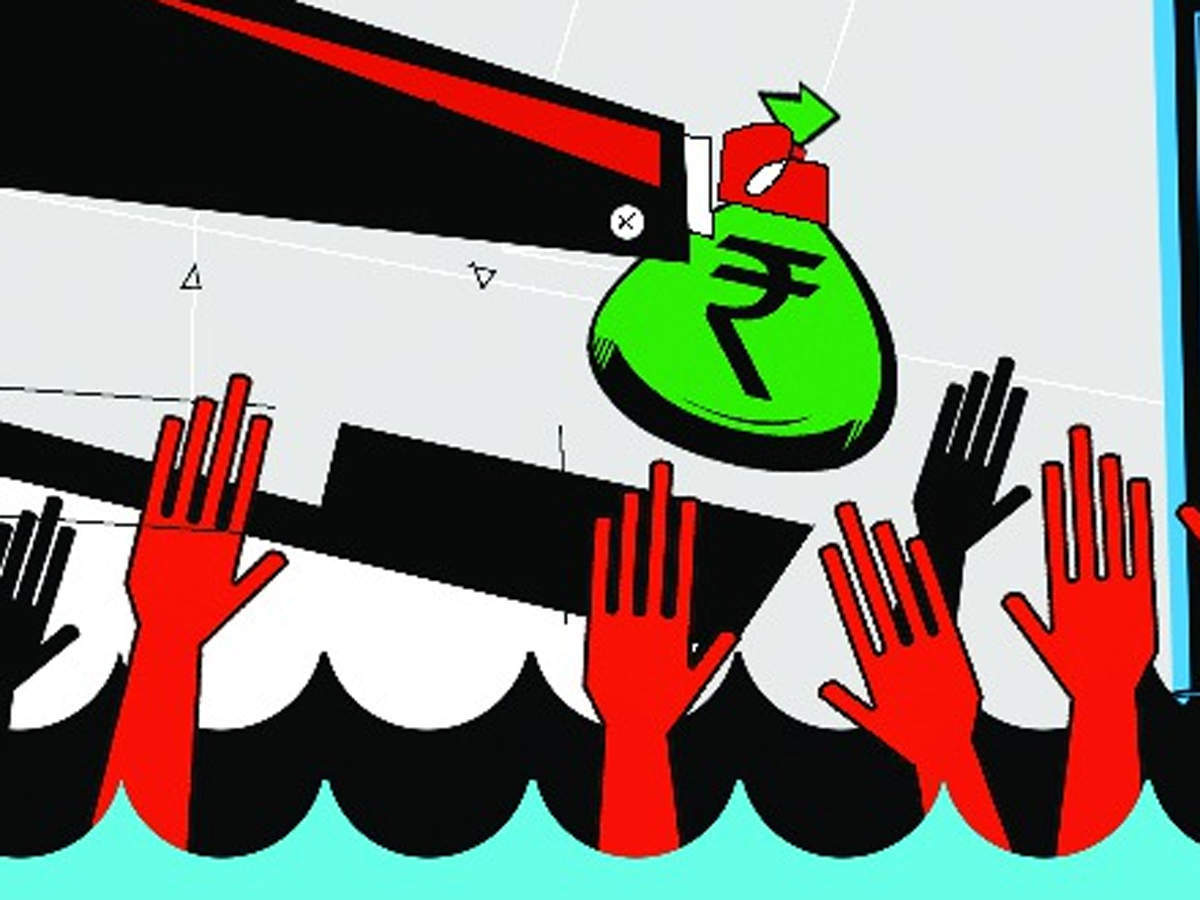

#### Problem Statement

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Analysis

Variable Definition
label: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn: mobile number of user

aon: age on cellular network in days

daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30: Average main account balance over last 30 days

rental90: Average main account balance over last 90 days

last_rech_date_ma: Number of days till last recharge of main account

last_rech_date_da: Number of days till last recharge of data account

last_rech_amt_ma: Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30: Number of times main account got recharged in last 30 days

fr_ma_rech30: Frequency of main account recharged in last 30 days

sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90: Number of times main account got recharged in last 90 days

fr_ma_rech90: Frequency of main account recharged in last 90 days

sumamnt_ma_rech90 Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

cnt_da_rech30: Number of times data account got recharged in last 30 days

fr_da_rech30: Frequency of data account recharged in last 30 days

cnt_da_rech90: Number of times data account got recharged in last 90 days

fr_da_rech90: Frequency of data account recharged in last 90 days

cnt_loans30: Number of loans taken by user in last 30 days

amnt_loans30: Total amount of loans taken by user in last 30 days

maxamnt_loans30: maximum amount of loan taken by the user in last 30 days

medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days

cnt_loans90: Number of loans taken by user in last 90 days

amnt_loans90: Total amount of loans taken by user in last 90 days

maxamnt_loans90: maximum amount of loan taken by the user in last 90 days

medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days

payback30: Average payback time in days over last 30 days

payback90: Average payback time in days over last 90 days

pcircle: telecom circle

pdate: date

In [2]:
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

In [3]:
df = pd.read_csv(r"D:\Arjun python\Data file.csv")
df.head(5)  # checking first rows of the dataset

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df.tail(5)   # checking last rows of the dataset

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,2,1.0,9065.0,4532.5,356.70,3,19,16591,7526.0,392.20,0.0,0.0,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [5]:
df.sample(5)  # checking random rows of the dataset

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
69930,69931,1,50363I88658,286.0,8829.080000,8908.600000,1424.41,1732.69,1.0,0.0,770,15,0.0,12322.0,770.0,136.00,26,0,23912,770.0,133.50,0.0,0.0,0,0,3,18,6.0,0.0,5.0,30,6,0.0,2.000000,2.000000,UPW,2016-07-21
64048,64049,1,16407I82730,304.0,14610.767667,14696.730000,1582.35,1844.55,5.0,0.0,770,11,5.0,15602.0,1539.0,29.00,21,0,30686,773.0,68.00,0.0,0.0,0,0,4,30,12.0,0.0,4.0,30,12,0.0,3.333333,3.333333,UPW,2016-07-19
27761,27762,1,90639I89239,914.0,3582.589333,3606.210000,326.85,675.33,9.0,34.0,1539,1,0.0,1539.0,1539.0,21.00,4,8,3258,773.0,19.00,0.0,0.0,1,0,2,12,6.0,0.0,3.0,18,6,0.0,0.000000,7.666667,UPW,2016-07-22
130732,130733,1,50536I70379,233.0,49.868667,49.868667,1867.32,1867.32,1.0,0.0,4048,5,4.0,7140.0,773.0,32.33,5,4,7140,773.0,32.33,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-19
94051,94052,1,33967I84458,168.0,46.445667,46.445667,815.65,815.65,3.0,0.0,773,4,2.0,3092.0,773.0,105.00,4,2,3092,773.0,105.00,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,6.500000,6.500000,UPW,2016-06-11


In [6]:
df.shape # checking size of the dataset

(209593, 37)

### Checking some more dataset rows for better understandings

In [7]:
df.sample(50)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
185381,185382,0,89734I95207,95.0,510.333333,531.000000,1333.68,3131.48,46.0,0.000000,1539,0,0.000000,0.0,0.0,0.00,3,0,5406,1547.0,62.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-20
159684,159685,1,79872I90848,310.0,7.630333,7.630333,80.11,80.11,5.0,0.000000,3467,1,0.000000,3467.0,3467.0,0.50,1,0,3467,3467.0,0.50,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-01
149947,149948,1,02494I88688,98.0,16257.989333,16373.460000,1307.48,1615.48,4.0,0.000000,1547,9,6.000000,17342.0,1547.0,55.00,13,2,31039,3178.0,55.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-22
60320,60321,1,27997I84450,1221.0,6395.752000,6414.920000,803.12,1005.32,2.0,0.000000,770,5,7.000000,5391.0,773.0,27.60,7,10,6937,773.0,24.60,0.0,0.0,0,0,3,18,6.0,0.0,4.0,24,6,0.0,8.000000,8.000000,UPW,2016-07-12
156507,156508,1,64380I82738,189.0,14122.000000,31953.430000,4973.58,11111.90,4.0,0.000000,1539,3,18.000000,7896.0,2309.0,1109.00,12,1,59549,4048.0,791.00,0.0,0.0,0,0,1,6,6.0,0.0,4.0,24,6,0.5,0.000000,2.000000,UPW,2016-08-15
127868,127869,1,06962I90841,167.0,6817.563333,6847.900000,664.76,1147.55,3.0,0.000000,773,5,790410.979534,6175.0,773.0,78.00,6,12,7722,1160.0,68.00,0.0,0.0,0,0,3,18,6.0,0.0,5.0,30,6,0.0,6.333333,5.500000,UPW,2016-07-19
168635,168636,1,46437I88648,464.0,2421.584000,2430.160000,297.64,370.76,5.0,0.000000,773,2,18.000000,2320.0,1160.0,204.00,4,19,4640,1160.0,233.00,0.0,0.0,0,0,2,12,6.0,0.0,3.0,18,6,0.0,6.000000,6.000000,UPW,2016-07-08
96160,96161,0,37562I84459,801.0,9394.800000,9417.000000,8749.99,12334.33,12.0,0.000000,770,2,8.000000,10770.0,5385.0,46.00,2,8,10770,5385.0,46.00,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-07-18
32337,32338,0,91080I88650,133.0,686.342667,901.980000,22753.90,28990.84,1.0,0.000000,770,6,2.000000,16969.0,1543.0,61.00,16,1,44270,1547.0,27.50,0.0,0.0,0,0,5,30,6.0,0.0,11.0,66,6,0.0,8.000000,4.818182,UPW,2016-07-19
172652,172653,1,86402I70787,141.0,2137.200000,2146.500000,191.28,239.10,7.0,0.000000,1539,6,4.000000,6161.0,771.5,77.50,6,4,6161,771.5,77.50,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-06


### Checking Columns

In [8]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

#### Remove unnecessary column

In [9]:
df.drop(["Unnamed: 0", 'msisdn'], inplace = True, axis = 1)  #msidsdn is a unique mobile no. of customer

#### Checking Target Variable

1    183431
0     26162
Name: label, dtype: int64


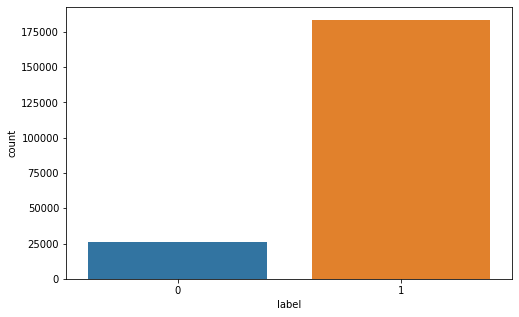

In [10]:
plt.figure(figsize = (8,5))
target = df.label.value_counts()
print(target)
target = sns.countplot(df.label)

#### Observations of the target variable
- Labels of the dataset are equally divided hence we need to balanced for better model prediction

#### Checking Datatypes

In [11]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

#### Observations
   - 'msisdn', 'pcircle', 'pdate' columns are objects type while rest of the columns are of numerical types.

#### Converting pdate column into date type

In [12]:
df.describe(include = 'all')

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


#### Observations:
- No null values present in the dataset
- Outliers are present as their is difference between the mean and 50 percentile data.
- Many of the data that should be in numerical format is in categorical format which would be needed to be converted

### Data Preprocessing

#### Checking Null Values of the Dataset

In [13]:
df.isnull().sum()/len(df) # checking null values percentage of dataset

label                   0.0
aon                     0.0
daily_decr30            0.0
daily_decr90            0.0
rental30                0.0
rental90                0.0
last_rech_date_ma       0.0
last_rech_date_da       0.0
last_rech_amt_ma        0.0
cnt_ma_rech30           0.0
fr_ma_rech30            0.0
sumamnt_ma_rech30       0.0
medianamnt_ma_rech30    0.0
medianmarechprebal30    0.0
cnt_ma_rech90           0.0
fr_ma_rech90            0.0
sumamnt_ma_rech90       0.0
medianamnt_ma_rech90    0.0
medianmarechprebal90    0.0
cnt_da_rech30           0.0
fr_da_rech30            0.0
cnt_da_rech90           0.0
fr_da_rech90            0.0
cnt_loans30             0.0
amnt_loans30            0.0
maxamnt_loans30         0.0
medianamnt_loans30      0.0
cnt_loans90             0.0
amnt_loans90            0.0
maxamnt_loans90         0.0
medianamnt_loans90      0.0
payback30               0.0
payback90               0.0
pcircle                 0.0
pdate                   0.0
dtype: float64

<AxesSubplot:>

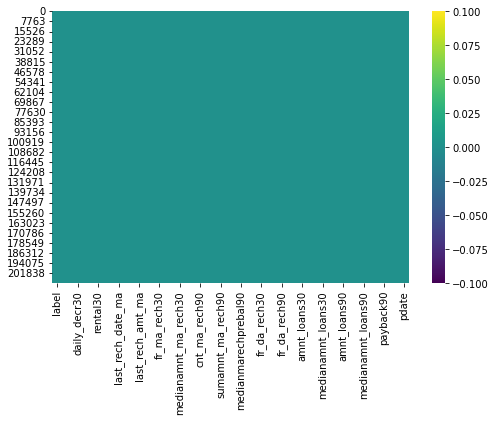

In [14]:
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cmap = 'viridis')  #checking null values visually

#### Observations:

- As per dataset there is no null values present.

### Checking duplicated values

In [15]:
df.duplicated().sum() # duplicate values counts of the train dataset 

31

#### Dropping duplicated values

In [16]:
df.drop_duplicates(keep = 'first', inplace = True)   # dropping duplicate values for improved dataset 

In [17]:
print(df.shape) #checking size of the dataset

(209562, 35)


## Data Preprocessing

In [18]:
df.dtypes  # checking datatypes for enchancing or extracting important details

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

#### Extracting Date from dataset

In [19]:
df['day_date'] = pd.to_datetime(df['pdate']).dt.day
df['month'] = pd.to_datetime(df['pdate']).dt.month
df['year'] = pd.to_datetime(df['pdate']).dt.year

In [20]:
df['year'].unique()

array([2016], dtype=int64)

In [21]:
#dropping pdate after extracting details 
df.drop(['year', 'pdate'], inplace = True, axis = 1)

### Checking Unique values

In [22]:
for i in df.columns:
    print(i, "column having ", df[i].nunique(), "unique values", "\n")  # train dataset

label column having  2 unique values 

aon column having  4507 unique values 

daily_decr30 column having  147025 unique values 

daily_decr90 column having  158669 unique values 

rental30 column having  132148 unique values 

rental90 column having  141033 unique values 

last_rech_date_ma column having  1186 unique values 

last_rech_date_da column having  1174 unique values 

last_rech_amt_ma column having  70 unique values 

cnt_ma_rech30 column having  71 unique values 

fr_ma_rech30 column having  1083 unique values 

sumamnt_ma_rech30 column having  15141 unique values 

medianamnt_ma_rech30 column having  510 unique values 

medianmarechprebal30 column having  30428 unique values 

cnt_ma_rech90 column having  110 unique values 

fr_ma_rech90 column having  89 unique values 

sumamnt_ma_rech90 column having  31771 unique values 

medianamnt_ma_rech90 column having  608 unique values 

medianmarechprebal90 column having  29785 unique values 

cnt_da_rech30 column having  1066 u

#### Observations:-
   - We find that there are so many columns dataset which having unique values hence we are going to convert sub attritues of dataset which having less than equal 100 unique values

#### Checking Unique columns values

In [23]:
j = []  # unique columns which having less than 100 unique values
for i in df.columns:
    if (df[i].nunique()<=100):
        j.append(i)
print(j)

['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'pcircle', 'day_date', 'month']


#### Dealing with last_rech_amt_ma

In [24]:
df['last_rech_amt_ma'].unique()

array([ 1539,  5787,   947,  2309,  3178,   773,  7526,  1547,   770,
           0,  4048,  8000,   173,  1924,  2320,  4917,  2593, 10000,
        1720, 11874,  3193, 16000,  1333,  4067,  3467,  5814,  7400,
        7560,   777, 15400,  1933, 17391, 11927,  6960, 21739,  1554,
       11327,  4940, 12500,   790,  5214, 32000, 11900,  9400, 11000,
        1580,  4340,  3466, 55000,   769, 11004,   946,  4066, 19130,
       17467,  4047,   954, 14783,  6222,   177, 19913,  1546,  1923,
       22609,  7999,  1538, 15652,   772, 34783, 10454], dtype=int64)

In [25]:
print(df['last_rech_amt_ma'].max()) #max
print(df['last_rech_amt_ma'].min()) #min

55000
0


In [26]:
# creating sub class of last_rech_amt_ma class
last_rech_amt_ma_class = []
for i in df['last_rech_amt_ma']:
    if i in range (1,15000 ):
        last_rech_amt_ma_class.append('1-15000 times')
    elif i in range (15000, 25000):
        last_rech_amt_ma_class.append('15000-25000 times')
    elif i in range(25000,35000):
        last_rech_amt_ma_class.append('25000-35000 times')
    elif i in range(35000, 45000):
        last_rech_amt_ma_class.append('35000-45000 times')
    elif i in range(45000, 56000):
        last_rech_amt_ma_class.append('45000+ times')
    elif i == 0:
        last_rech_amt_ma_class.append('Zero times')
len(last_rech_amt_ma_class)

209562

In [27]:
df['last_rech_amt_ma'] = last_rech_amt_ma_class

#### Dealing with cnt_ma_rech30

In [28]:
df['cnt_ma_rech30'].unique()

array([  2,   1,   0,   7,   4,   3,   5,  15,   6,   9,  10,  11,  13,
         8,  12,  16,  18,  19,  29,  17,  14,  21,  27,  22,  37,  23,
        20,  26,  25,  24,  34,  28,  32,  35,  31,  33,  40,  30,  41,
        36,  52,  38,  48,  61,  39,  54,  84,  42,  44,  46,  45,  47,
        49,  43,  55,  74,  58,  64,  59,  53,  51,  77,  78,  50,  91,
        99, 115, 203,  60,  71,  63], dtype=int64)

In [29]:
print(df['cnt_ma_rech30'].max()) #max
print(df['cnt_ma_rech30'].min()) #min

203
0


In [30]:
# creating sub class of cnt_ma_rech30 class
cnt_ma_rech30_class = []
for i in df['cnt_ma_rech30']:
    if i in range (1, 51):
        cnt_ma_rech30_class.append('1-50 times')
    elif i in range (51, 101):
        cnt_ma_rech30_class.append('51-100 times')
    elif i in range(101,151):
        cnt_ma_rech30_class.append('101-150 times')
    elif i in range(151, 201):
        cnt_ma_rech30_class.append('151-200 times')
    elif i in range(201, 250):
        cnt_ma_rech30_class.append('200+ times')
    elif i == 0:
        cnt_ma_rech30_class.append('Zero times')
len(cnt_ma_rech30_class)

209562

In [31]:
df['cnt_ma_rech30'] = cnt_ma_rech30_class

#### Dealing with fr_ma_rech90

In [32]:
df['fr_ma_rech90'].unique()

array([21,  0,  2,  3,  1,  5, 30, 10, 26,  8, 31, 64, 66, 12, 32, 15,  7,
       18,  4,  9, 57, 50, 67, 11,  6, 44, 41, 45, 35, 40, 33, 34, 37, 22,
       23, 17, 36, 42, 25, 20, 13, 14, 47, 46, 51, 16, 39, 48, 59, 24, 38,
       19, 55, 62, 52, 65, 29, 74, 28, 71, 54, 56, 60, 43, 49, 27, 70, 53,
       73, 78, 68, 58, 79, 69, 61, 72, 85, 77, 75, 80, 63, 86, 83, 76, 88,
       82, 84, 81, 87], dtype=int64)

In [33]:
print(df['fr_ma_rech90'].max()) #max
print(df['fr_ma_rech90'].min()) #min

88
0


In [34]:
# creating sub class of fr_ma_rech90 class
fr_ma_rech90_class = []
for i in df['fr_ma_rech90']:
    if i in range (1, 20):
        fr_ma_rech90_class.append('1-20 times')
    elif i in range (20, 40):
        fr_ma_rech90_class.append('20-40 times')
    elif i in range(40,60):
        fr_ma_rech90_class.append('40-60 times')
    elif i in range(60, 80):
        fr_ma_rech90_class.append('60-80 times')
    elif i in range(80, 100):
        fr_ma_rech90_class.append('80+ times')
    elif i == 0:
        fr_ma_rech90_class.append('Zero times')
len(fr_ma_rech90_class)

209562

In [35]:
df['fr_ma_rech90'] = fr_ma_rech90_class

#### Dealing with cnt_da_rech90

In [36]:
df['cnt_da_rech90'].unique()

array([ 0,  1,  3,  2,  5,  6,  8,  4, 27,  7,  9, 14, 12, 22, 13, 10, 16,
       19, 11, 15, 38, 18, 20, 30, 28, 25, 17], dtype=int64)

In [37]:
print(df['cnt_da_rech90'].max()) #max
print(df['cnt_da_rech90'].min()) #min

38
0


In [38]:
# creating sub class of cnt_da_rech90 class
cnt_da_rech90_class = []
for i in df['cnt_da_rech90']:
    if i in range (1, 10):
        cnt_da_rech90_class.append('1-10 times')
    elif i in range (10, 20):
        cnt_da_rech90_class.append('10-20 times')
    elif i in range(20,30):
        cnt_da_rech90_class.append('20-30 times')
    elif i in range(30, 40):
        cnt_da_rech90_class.append('30-40 times')
    elif i == 0:
        cnt_da_rech90_class.append('Zero times')
len(cnt_da_rech90_class)

209562

In [39]:
df['cnt_da_rech90'] = cnt_da_rech90_class

#### Dealing with fr_da_rech90

In [40]:
df['fr_da_rech90'].unique()

array([ 0, 16,  8,  5, 11,  4,  6, 27, 29,  3,  9, 19, 24, 57,  1, 35, 28,
       30,  7, 18, 13, 37,  2, 17, 14, 10, 12, 22, 15, 21, 42, 20, 23, 26,
       25, 34, 32, 39, 31, 33, 43, 56, 46, 41, 55, 64], dtype=int64)

In [41]:
print(df['fr_da_rech90'].max()) #max
print(df['fr_da_rech90'].min()) #min

64
0


In [42]:
# creating sub class of fr_da_rech90 class
fr_da_rech90_class = []
for i in df['fr_da_rech90']:
    if i in range (1, 10):
        fr_da_rech90_class.append('1-10 times')
    elif i in range (10, 20):
        fr_da_rech90_class.append('10-20 times')
    elif i in range(20,30):
        fr_da_rech90_class.append('20-30 times')
    elif i in range(30, 40):
        fr_da_rech90_class.append('30-40 times')
    elif i in range(40, 50):
        fr_da_rech90_class.append('40-50 times')
    elif i in range(50, 60):
        fr_da_rech90_class.append('50-60 times')
    elif i in range(60, 70):
        fr_da_rech90_class.append('60-70 times')
    elif i == 0:
        fr_da_rech90_class.append('Zero times')
len(fr_da_rech90_class)

209562

In [43]:
df['fr_da_rech90'] = fr_da_rech90_class

#### Dealing with cnt_loans30

In [44]:
df['cnt_loans30'].unique()

array([ 2,  1,  7,  3,  4,  5,  8,  6, 10, 12,  0, 11,  9, 21, 17, 15, 19,
       13, 18, 25, 22, 20, 16, 14, 28, 29, 23, 33, 30, 26, 36, 31, 27, 24,
       32, 38, 41, 44, 50, 35], dtype=int64)

In [45]:
print(df['cnt_loans30'].max()) #max
print(df['cnt_loans30'].min()) #min

50
0


In [46]:
# creating sub class of cnt_loans30 class
cnt_loans30_class = []
for i in df['cnt_loans30']:
    if i in range (1, 10):
        cnt_loans30_class.append('1-10 times')
    elif i in range (10, 20):
        cnt_loans30_class.append('10-20 times')
    elif i in range(20,30):
        cnt_loans30_class.append('20-30 times')
    elif i in range(30, 40):
        cnt_loans30_class.append('30-40 times')
    elif i in range(40, 50):
        cnt_loans30_class.append('40-50 times')
    elif i in range(50, 60):
        cnt_loans30_class.append('50-60 times')
    elif i == 0:
        cnt_loans30_class.append('Zero times')
len(cnt_loans30_class)

209562

In [47]:
df['cnt_loans30'] = cnt_loans30_class

#### Dealing with amnt_loans30

In [48]:
df['amnt_loans30'].unique()

array([ 12,   6,  42,  18,  24,  30,  48,  54,  36,  60,  72,   0,  66,
       114, 102, 126,  90, 156,  78, 108,  84, 150, 132,  96, 120, 180,
       228, 138, 174, 162, 168, 144, 276, 198, 306, 222, 210, 186, 270,
       258, 216, 264, 192, 252, 246, 300, 240, 204], dtype=int64)

In [49]:
print(df['amnt_loans30'].max()) #max
print(df['amnt_loans30'].min()) #min

306
0


In [50]:
# creating sub class of amnt_loans30 class
amnt_loans30_class = []
for i in df['amnt_loans30']:
    if i in range (1, 50):
        amnt_loans30_class.append('1-50 times')
    elif i in range (50, 100):
        amnt_loans30_class.append('50-100 times')
    elif i in range(100,150):
        amnt_loans30_class.append('100-150 times')
    elif i in range(150, 200):
        amnt_loans30_class.append('150-200 times')
    elif i in range(200, 250):
        amnt_loans30_class.append('200-250 times')
    elif i in range(250, 300):
        amnt_loans30_class.append('250-300 times')
    elif i in range(300, 350):
        amnt_loans30_class.append('300-350 times')
    elif i == 0:
        amnt_loans30_class.append('Zero times')
len(amnt_loans30_class)

209562

In [51]:
df['amnt_loans30'] = amnt_loans30_class

#### Dealing with medianamnt_loans30

In [52]:
df['medianamnt_loans30'].unique()

array([0. , 1. , 0.5, 2. , 1.5, 3. ])

#### Dealing with amnt_loans90

In [53]:
df['amnt_loans90'].unique()

array([ 12,   6,  42,  18,  24,  30,  48, 108,  36,  60,  78,  54,  72,
         0, 204, 162,  84, 132,  66,  90, 102, 300, 138, 168,  96, 114,
       156, 120, 126, 144, 180, 198, 174, 216, 192, 276, 150, 234, 228,
       312, 222, 384, 186, 240, 252, 408, 288, 210, 306, 354, 258, 270,
       396, 246, 342, 264, 378, 426, 294, 438, 330, 318, 360, 324, 348,
       372, 282, 402, 336], dtype=int64)

In [54]:
print(df['amnt_loans90'].max()) #max
print(df['amnt_loans90'].min()) #min

438
0


In [55]:
# creating sub class of amnt_loans90 class
amnt_loans90_class = []
for i in df['amnt_loans90']:
    if i in range (1, 100):
        amnt_loans90_class.append('1-100 times')
    elif i in range (100, 200):
        amnt_loans90_class.append('100-200 times')
    elif i in range(200,300):
        amnt_loans90_class.append('200-300 times')
    elif i in range(300, 400):
        amnt_loans90_class.append('300-400 times')
    elif i in range(400, 500):
        amnt_loans90_class.append('400-500 times')
    elif i == 0:
        amnt_loans90_class.append('Zero times')
len(amnt_loans90_class)

209562

In [56]:
df['amnt_loans90'] = amnt_loans90_class

#### Dealing with cnt_ma_rech90

In [57]:
df['cnt_ma_rech90'].unique()

array([  2,   1,   8,   9,   4,   7,   0,   3,  19,  10,   6,  20,  11,
        16,  15,   5,  18,  14,  13,  12,  34,  30,  17,  25,  26,  23,
        33,  27,  22,  70,  40,  21,  39,  24,  35,  28,  37,  31,  29,
        43,  45,  48,  63,  42,  32,  36,  46,  59,  38,  53,  57,  51,
        62,  49,  58,  41,  64,  83,  82,  67,  50,  60,  47,  90,  97,
        54,  44,  56,  73, 172,  74,  71,  78,  52, 118,  69,  68,  61,
        55,  92,  75,  80,  77,  99,  65,  79,  94,  72,  66,  93,  85,
        86, 140, 110,  84,  81, 105, 100,  98, 121, 132,  88, 127,  96,
       336, 151, 104,  91,  87, 120], dtype=int64)

In [58]:
print(df['cnt_ma_rech90'].max()) #max
print(df['cnt_ma_rech90'].min()) #min

336
0


In [59]:
# creating sub class of amnt_loans90 class
cnt_ma_rech90_class = []
for i in df['cnt_ma_rech90']:
    if i in range (1, 50):
        cnt_ma_rech90_class.append('1-50 times')
    elif i in range (50, 100):
        cnt_ma_rech90_class.append('50-100 times')
    elif i in range(100,150):
        cnt_ma_rech90_class.append('100-150 times')
    elif i in range(150, 200):
        cnt_ma_rech90_class.append('150-200 times')
    elif i in range(200, 250):
        cnt_ma_rech90_class.append('200-250 times')
    elif i in range(250, 300):
        cnt_ma_rech90_class.append('250-300 times')
    elif i in range(300, 350):
        cnt_ma_rech90_class.append('300-350 times')
    elif i == 0:
        cnt_ma_rech90_class.append('Zero times')
len(cnt_ma_rech90_class)

209562

In [60]:
df['cnt_ma_rech90'] = cnt_ma_rech90_class

#### Dealing with maxamnt_loans90

In [61]:
df['maxamnt_loans90'].unique()

array([ 6, 12,  0], dtype=int64)

#### Dealing with medianamnt_loans90

In [62]:
df['medianamnt_loans90'].unique()

array([0. , 1. , 0.5, 2. , 1.5, 3. ])

In [63]:
j = []  # unique columns which having less than 10 unique values
for i in df.columns:
    if (df[i].nunique()<=10):
        j.append(i)
        
for i in j:
    print("--------------"+i+"---------------------",'\n' ,df[i].value_counts(), "\n")  # checking unique counts

--------------label--------------------- 
 1    183429
0     26133
Name: label, dtype: int64 

--------------last_rech_amt_ma--------------------- 
 1-15000 times        188341
Zero times            20965
15000-25000 times       195
25000-35000 times        33
45000+ times             28
Name: last_rech_amt_ma, dtype: int64 

--------------cnt_ma_rech30--------------------- 
 1-50 times       181579
Zero times        27949
51-100 times         32
101-150 times         1
200+ times            1
Name: cnt_ma_rech30, dtype: int64 

--------------cnt_ma_rech90--------------------- 
 1-50 times       188191
Zero times        20920
50-100 times        437
100-150 times        11
150-200 times         2
300-350 times         1
Name: cnt_ma_rech90, dtype: int64 

--------------fr_ma_rech90--------------------- 
 1-20 times     116060
Zero times      65723
20-40 times     18657
40-60 times      7875
60-80 times      1188
80+ times          59
Name: fr_ma_rech90, dtype: int64 

--------------cnt

In [64]:
df.head() #checking dataframe changes

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,day_date,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1-15000 times,1-50 times,21.0,3078.0,1539.0,7.50,1-50 times,20-40 times,3078,1539.0,7.50,0.0,0.0,Zero times,Zero times,1-10 times,1-50 times,6.0,0.0,2.0,1-100 times,6,0.0,29.000000,29.000000,UPW,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,1-15000 times,1-50 times,0.0,5787.0,5787.0,61.04,1-50 times,Zero times,5787,5787.0,61.04,0.0,0.0,Zero times,Zero times,1-10 times,1-50 times,12.0,0.0,1.0,1-100 times,12,0.0,0.000000,0.000000,UPW,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1-15000 times,1-50 times,0.0,1539.0,1539.0,66.32,1-50 times,Zero times,1539,1539.0,66.32,0.0,0.0,Zero times,Zero times,1-10 times,1-50 times,6.0,0.0,1.0,1-100 times,6,0.0,0.000000,0.000000,UPW,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,1-15000 times,Zero times,0.0,0.0,0.0,0.00,1-50 times,Zero times,947,947.0,2.50,0.0,0.0,Zero times,Zero times,1-10 times,1-50 times,6.0,0.0,2.0,1-100 times,6,0.0,0.000000,0.000000,UPW,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,1-15000 times,1-50 times,2.0,20029.0,2309.0,29.00,1-50 times,1-20 times,23496,2888.0,35.00,0.0,0.0,Zero times,Zero times,1-10 times,1-50 times,6.0,0.0,7.0,1-100 times,6,0.0,2.333333,2.333333,UPW,22,6


### Exploratory Data Analysis

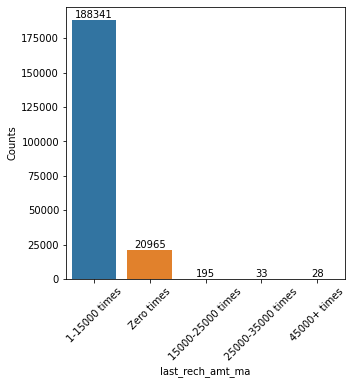

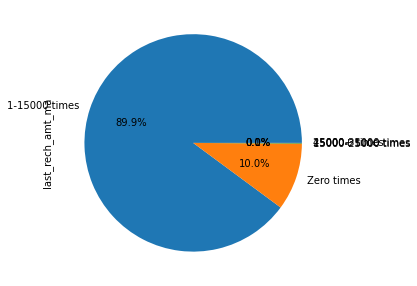

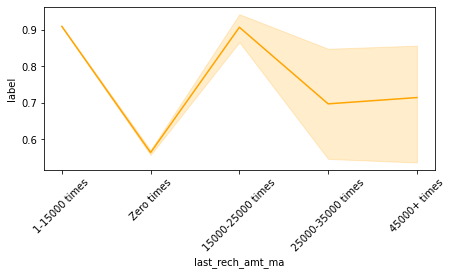

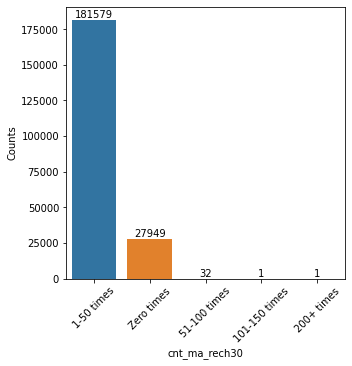

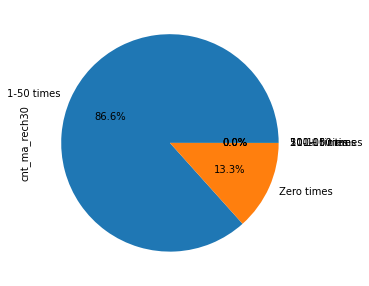

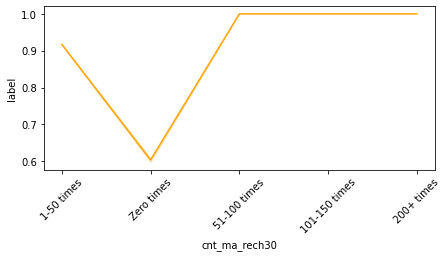

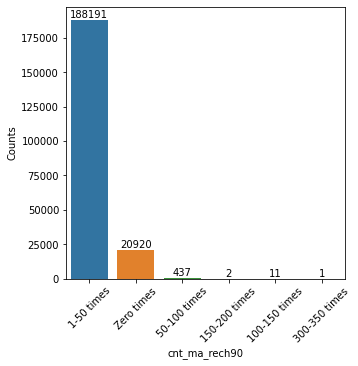

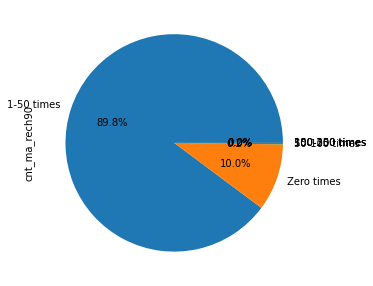

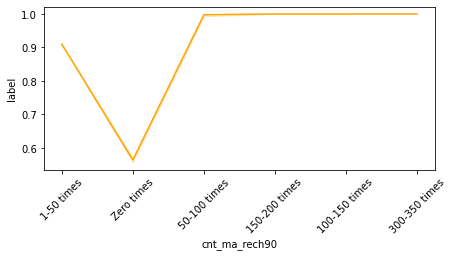

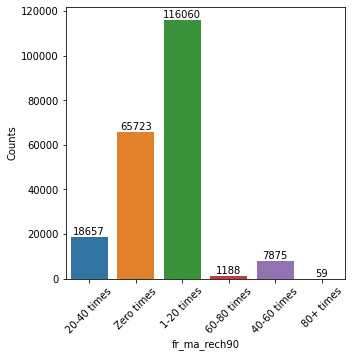

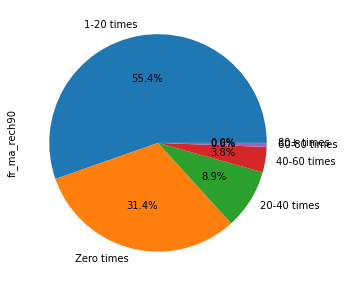

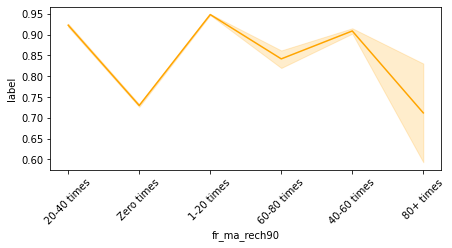

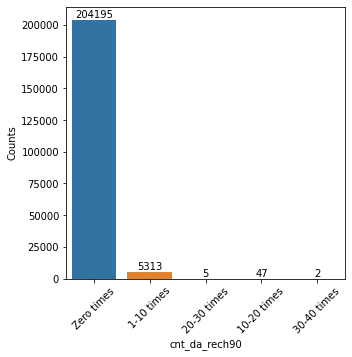

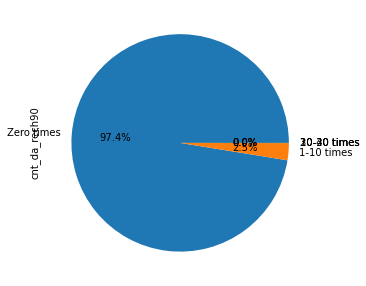

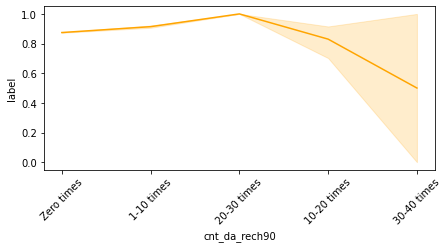

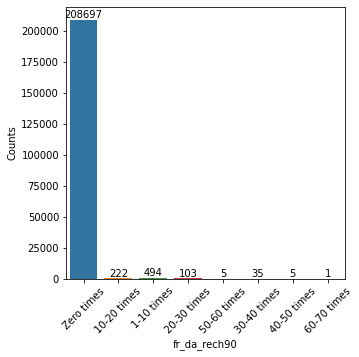

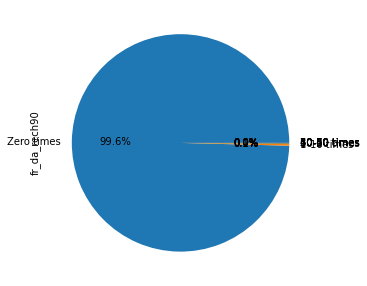

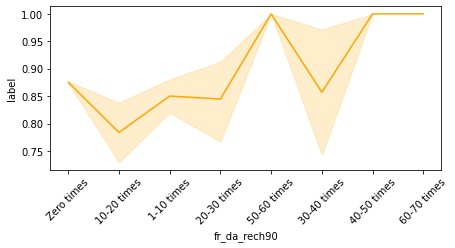

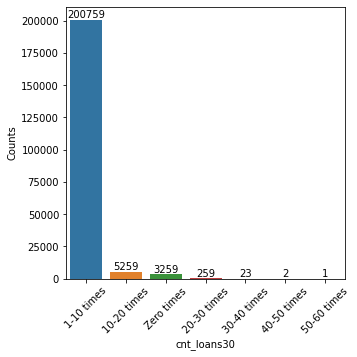

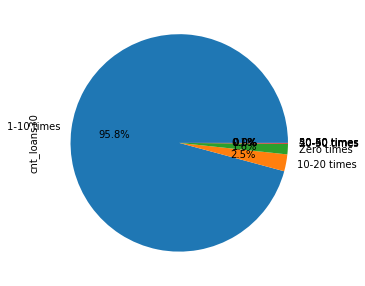

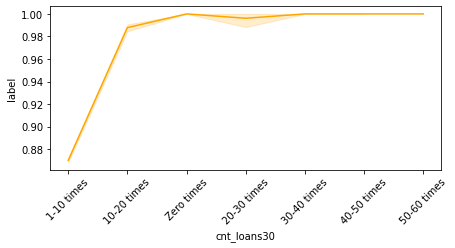

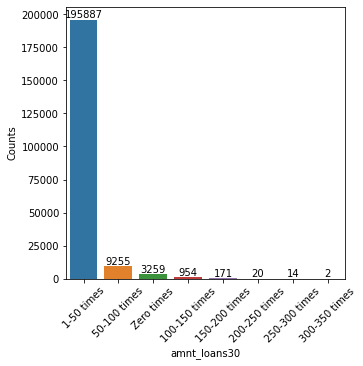

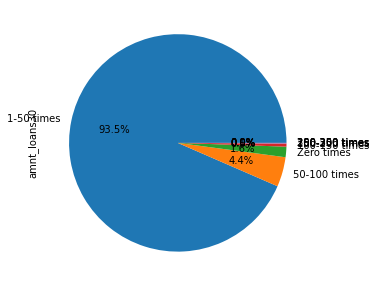

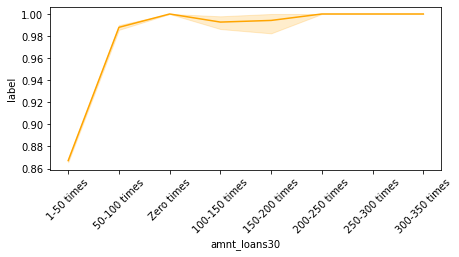

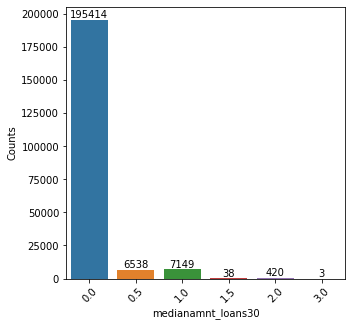

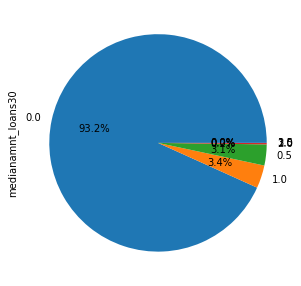

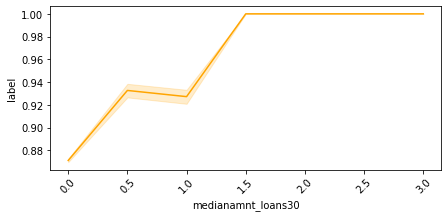

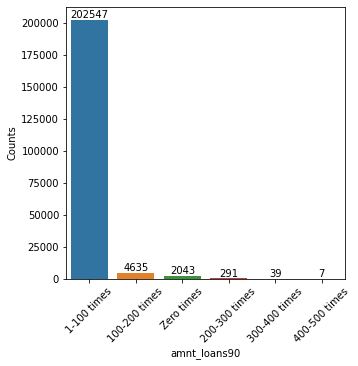

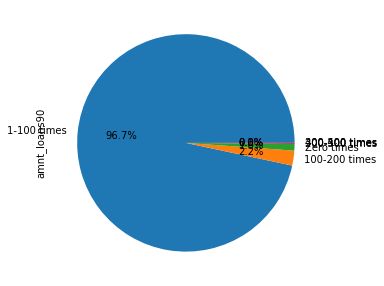

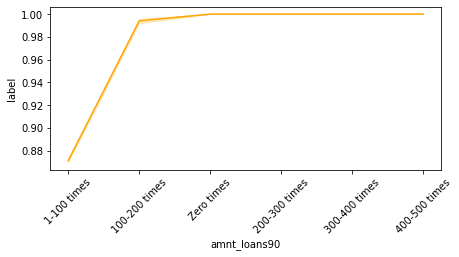

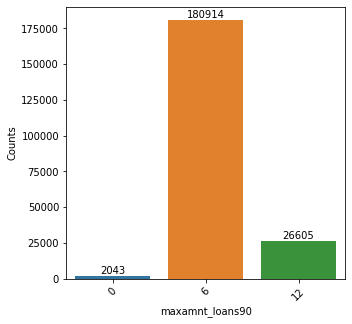

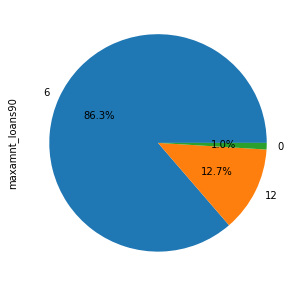

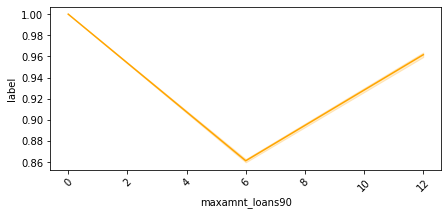

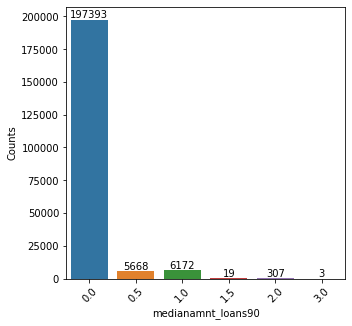

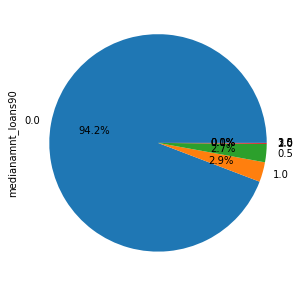

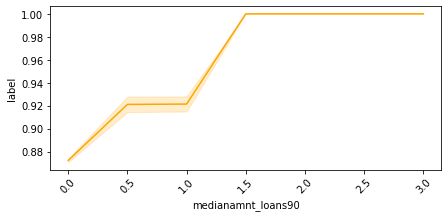

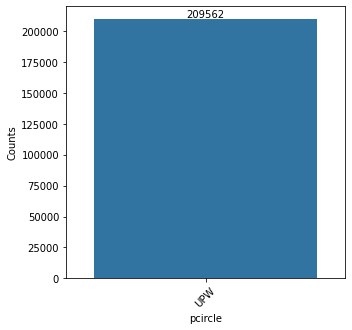

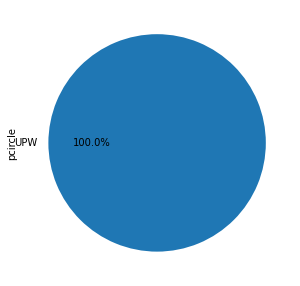

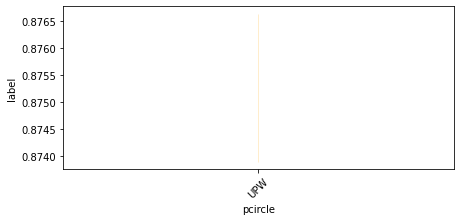

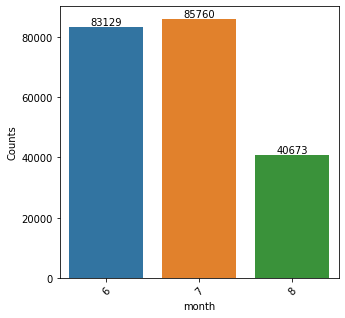

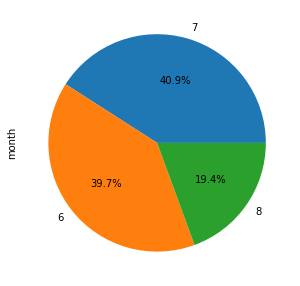

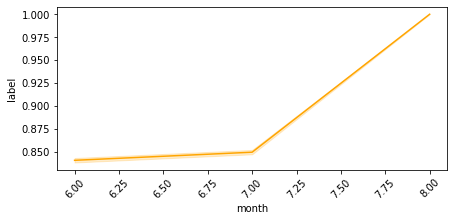

In [67]:
for k in j[1:]:  # using dataset which having unique values less than 10
    col = df[k].value_counts()
    plt.figure(figsize = (5,5))
    df_col = sns.countplot(x=k, data = df)
    df_col.set_ylabel('Counts')
    plt.xticks(rotation = 45)
    for i in df_col.containers:
        df_col.bar_label(i)

    # Percentage of gender
    plt.figure(figsize = (5,5))
    col.plot(kind = 'pie', autopct = '%1.1f%%')


    plt.figure(figsize=(7,3))
    sns.lineplot(x=k,y='label', data=df, color='orange',)
    plt.xticks(rotation = 45)
    plt.show()


#### Observations: -
- In last_rech_amt_ma having more counts in 1-15000 times while very less in 45000+ cases.

- Most of the cases are of 1-50 times in cnt_ma_rech30.

- 1-20 times cases are more from rest of cases in fr_ma_rech90.

- In cnt_da_rech90 and fr_da_rech most of the cases are of 0 times.

- cnt_loans are more in 1-10 times as per dataset.

- Most of the customer takes 1-50 times amnt_loans30 in 30 days.

- Most of the customer medianamnt_loans30 are zero as per dataset..

- In 90 days most of the customers takes 1-100 times loans.

- maxamnt_loans90 are 6 lakhs in 90 days.

- medianamnt_loans90 are having zero cases more.

- Months and pcircle are show not miserable changes as per dataset.


## Catplot with respect to Loan_Status labels

<Figure size 432x432 with 0 Axes>

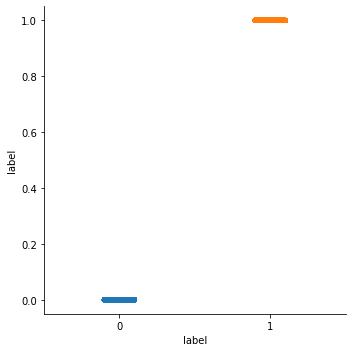

<Figure size 432x432 with 0 Axes>

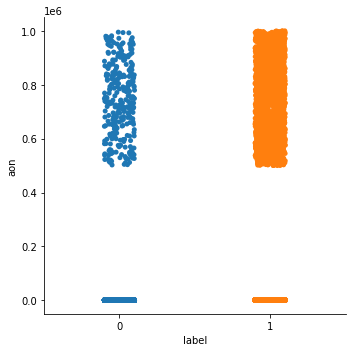

<Figure size 432x432 with 0 Axes>

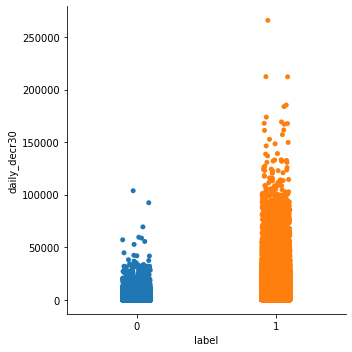

<Figure size 432x432 with 0 Axes>

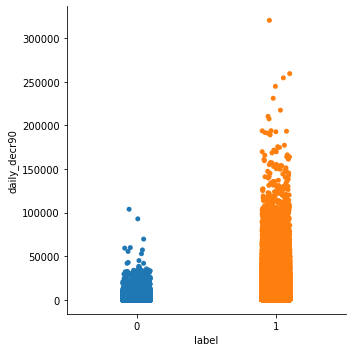

<Figure size 432x432 with 0 Axes>

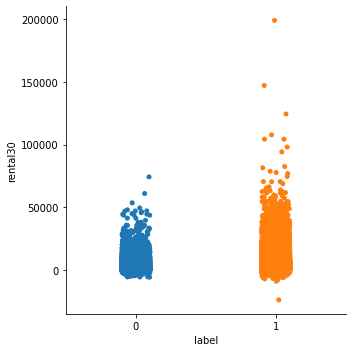

<Figure size 432x432 with 0 Axes>

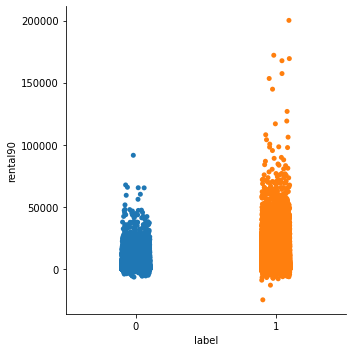

<Figure size 432x432 with 0 Axes>

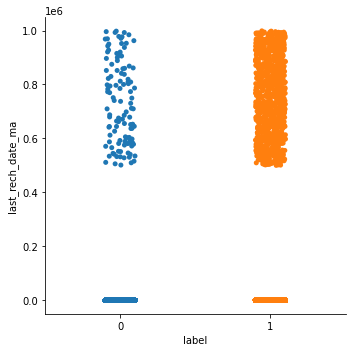

<Figure size 432x432 with 0 Axes>

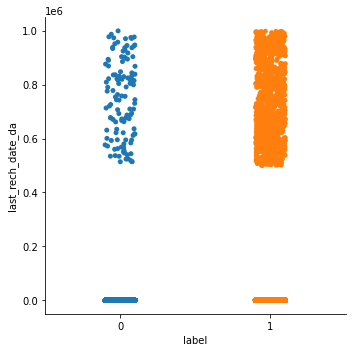

<Figure size 432x432 with 0 Axes>

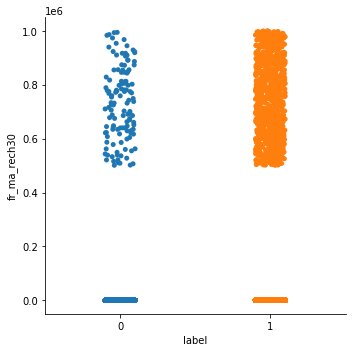

<Figure size 432x432 with 0 Axes>

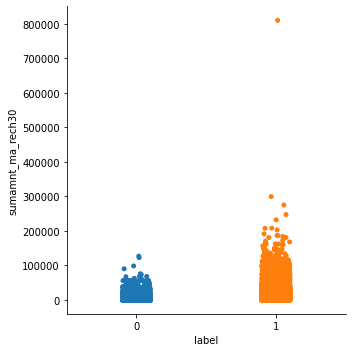

<Figure size 432x432 with 0 Axes>

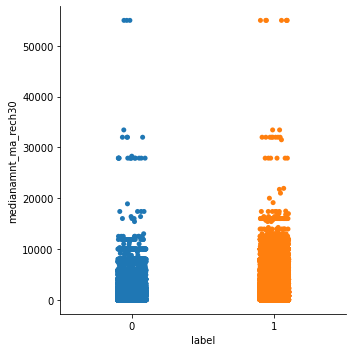

<Figure size 432x432 with 0 Axes>

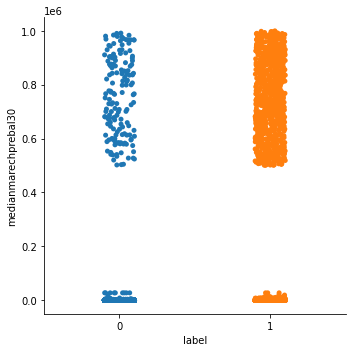

<Figure size 432x432 with 0 Axes>

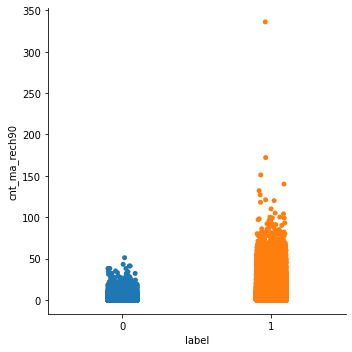

<Figure size 432x432 with 0 Axes>

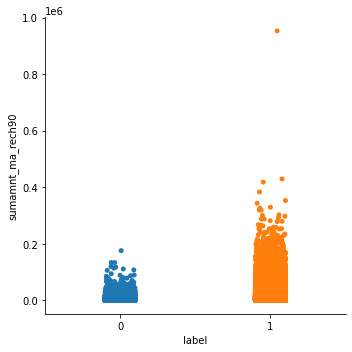

<Figure size 432x432 with 0 Axes>

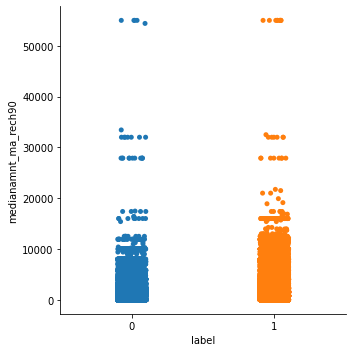

<Figure size 432x432 with 0 Axes>

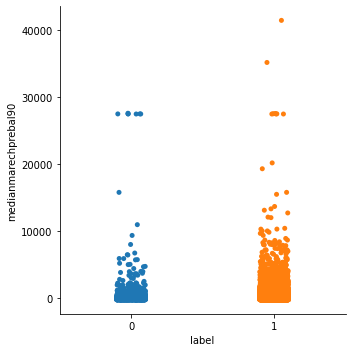

<Figure size 432x432 with 0 Axes>

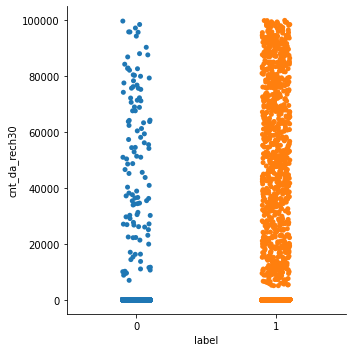

<Figure size 432x432 with 0 Axes>

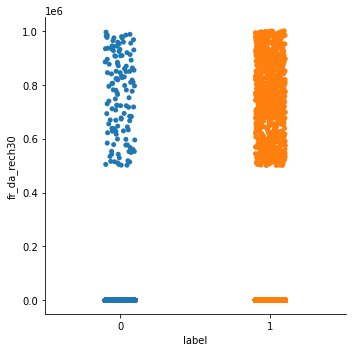

<Figure size 432x432 with 0 Axes>

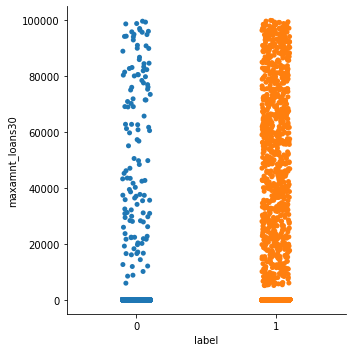

<Figure size 432x432 with 0 Axes>

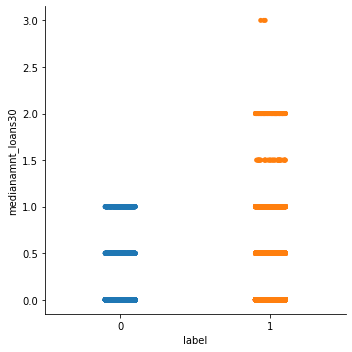

<Figure size 432x432 with 0 Axes>

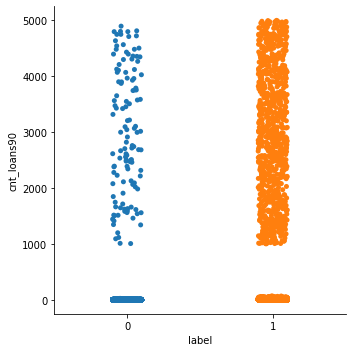

<Figure size 432x432 with 0 Axes>

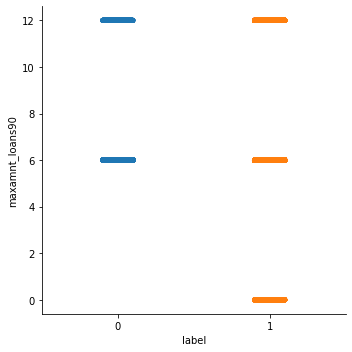

<Figure size 432x432 with 0 Axes>

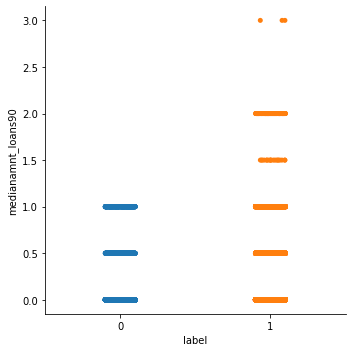

<Figure size 432x432 with 0 Axes>

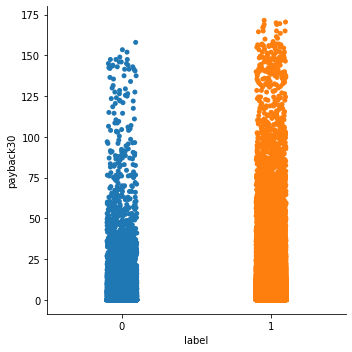

<Figure size 432x432 with 0 Axes>

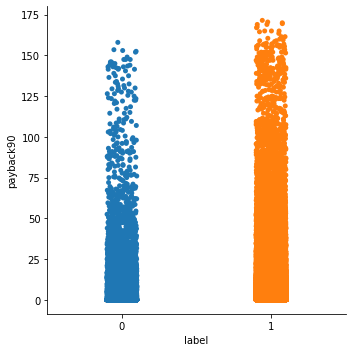

<Figure size 432x432 with 0 Axes>

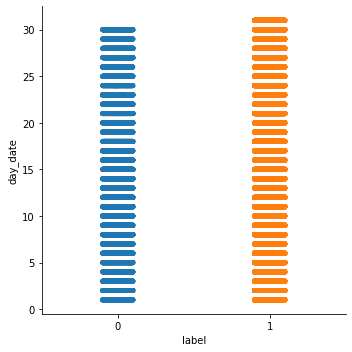

<Figure size 432x432 with 0 Axes>

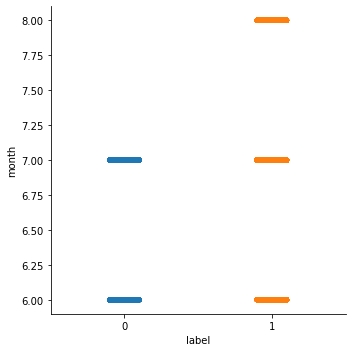

In [62]:
for i in df.select_dtypes(exclude = 'object'):
    plt.figure(figsize = (6,6))
    sns.catplot(x = "label", y = i, data = df)
    

#### Box Plot

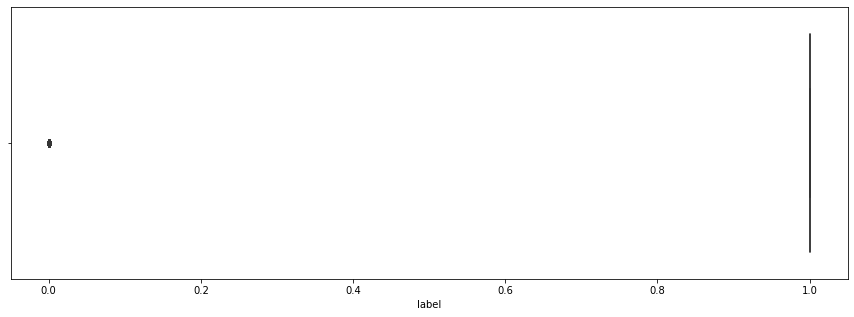

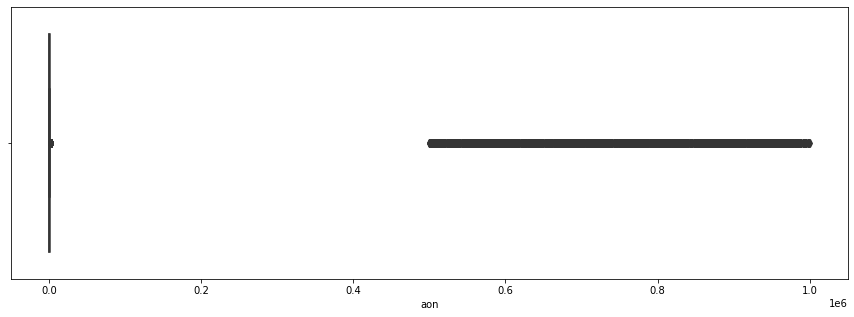

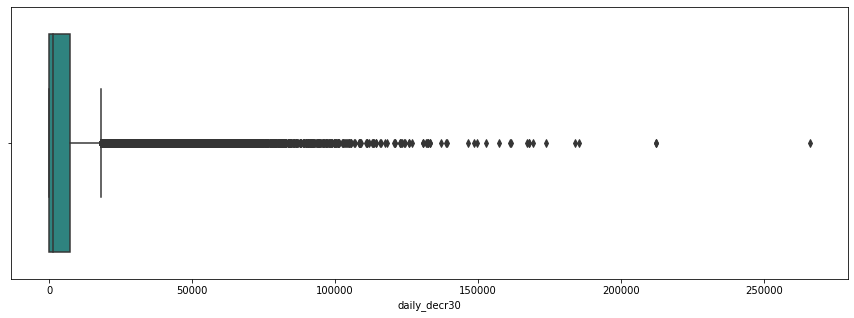

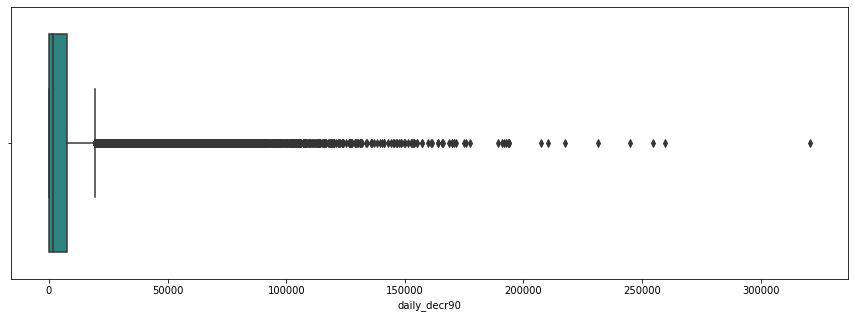

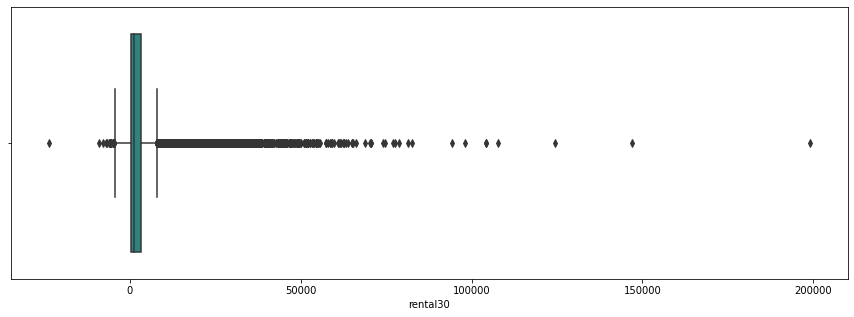

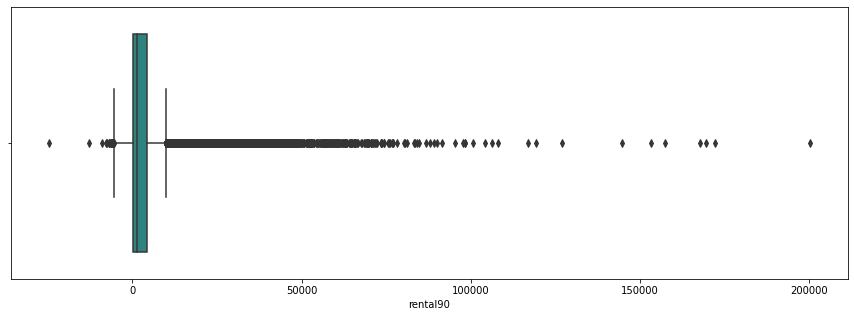

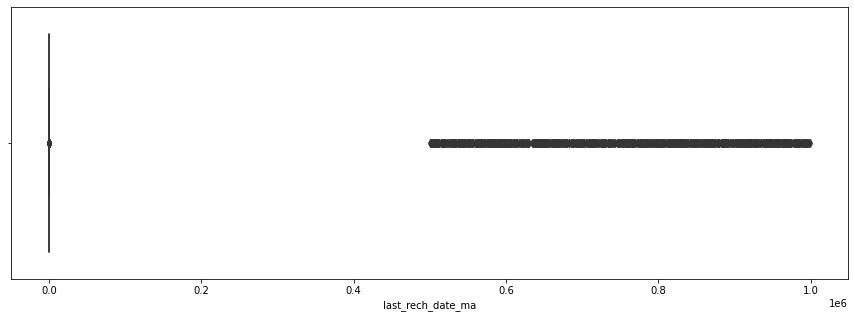

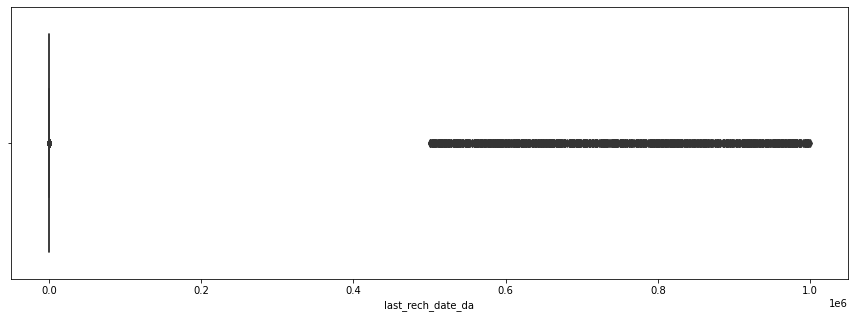

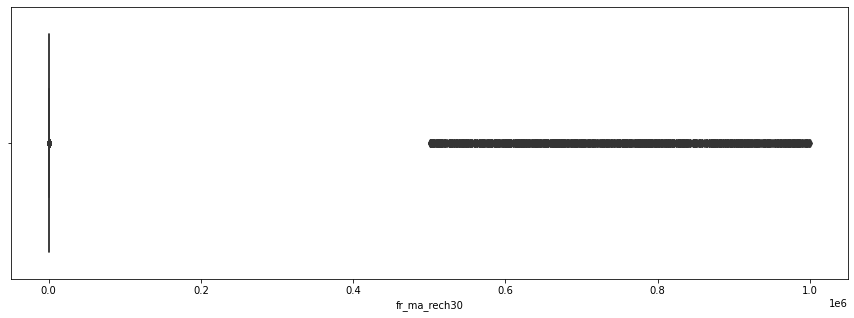

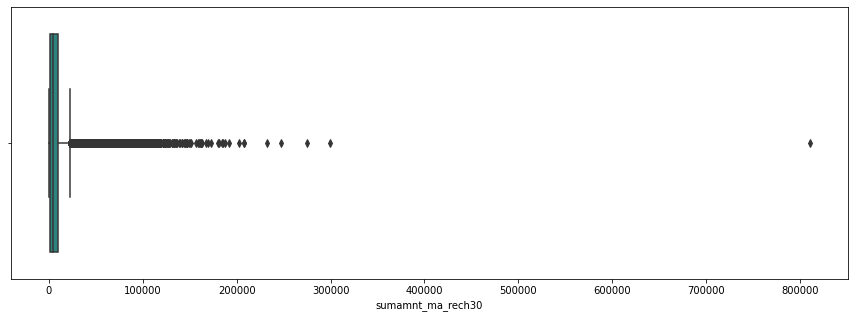

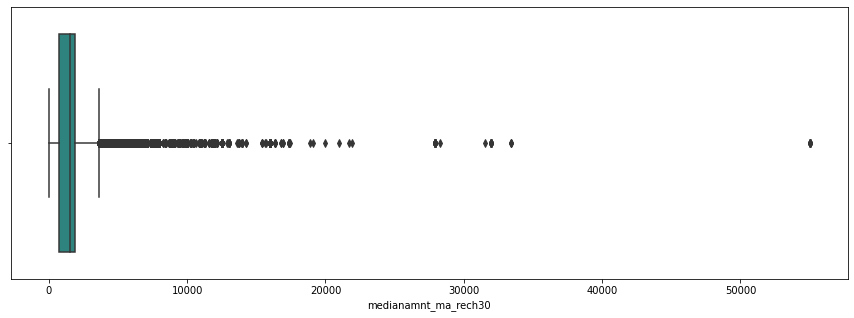

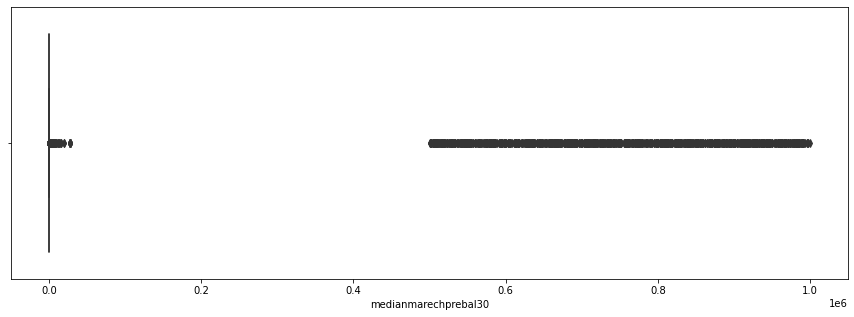

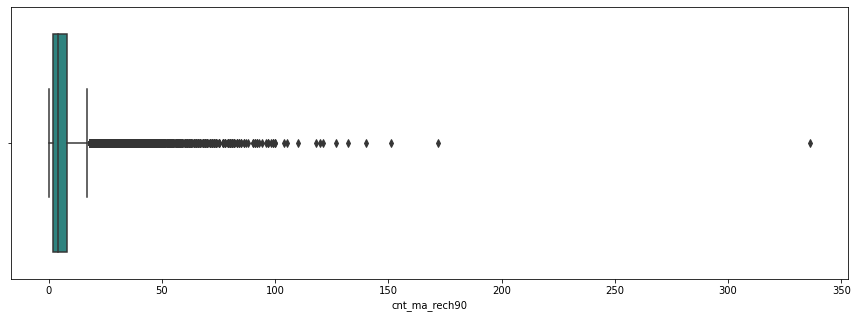

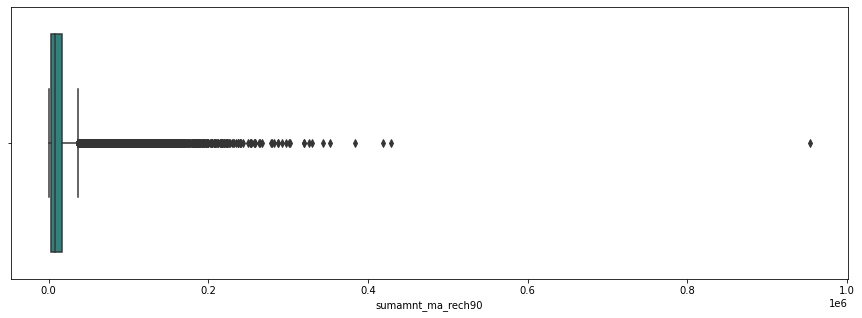

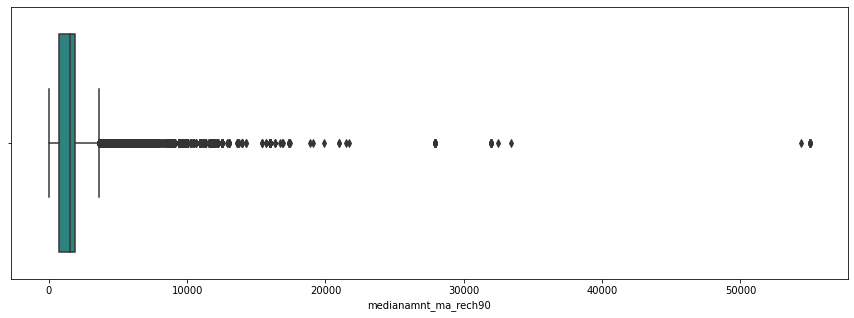

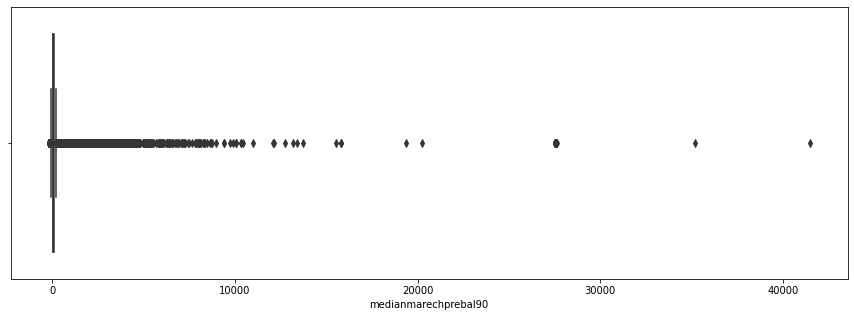

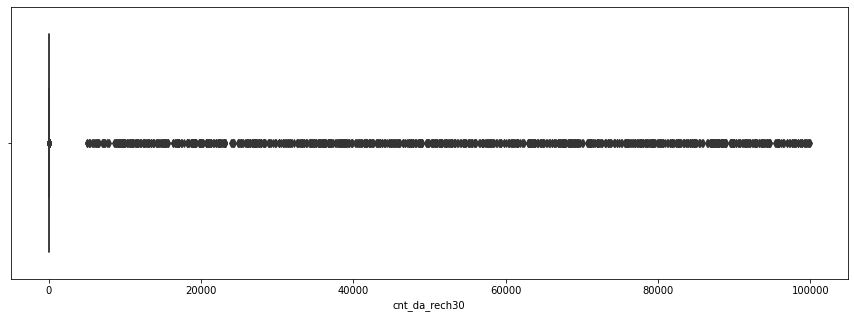

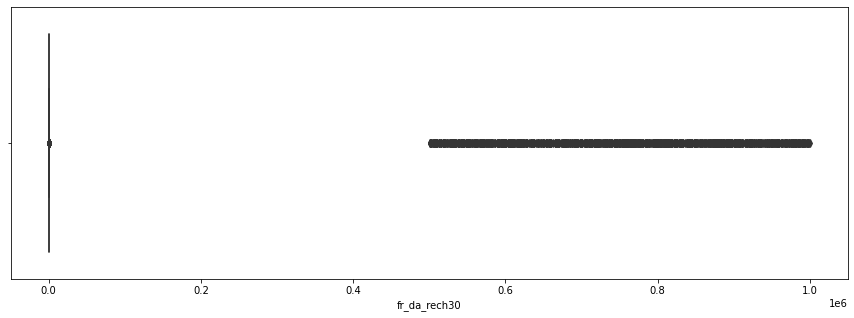

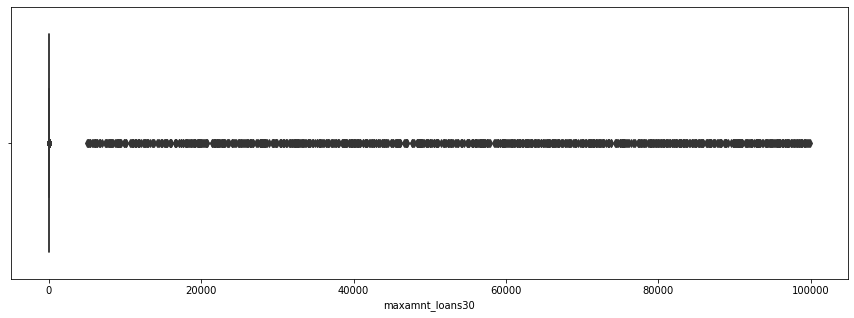

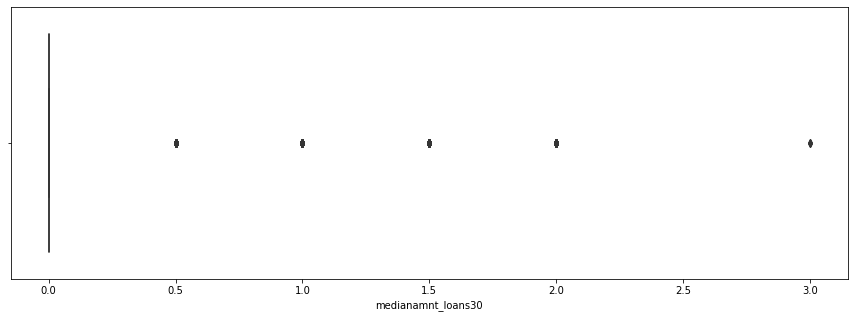

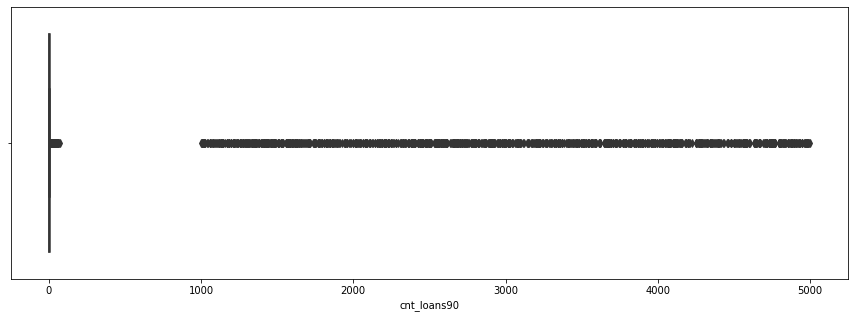

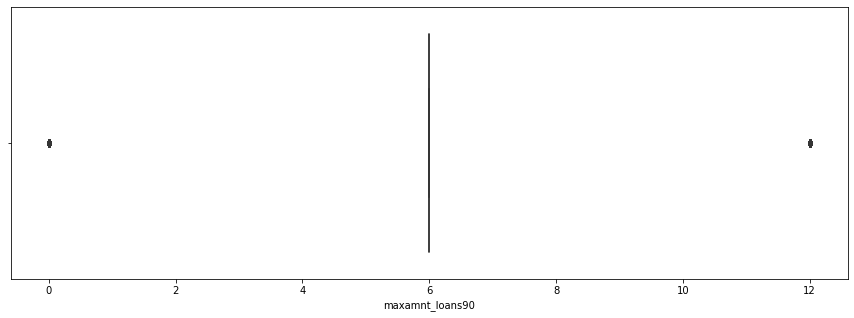

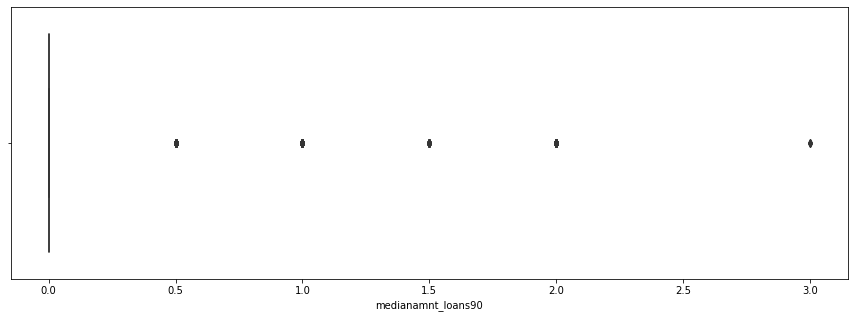

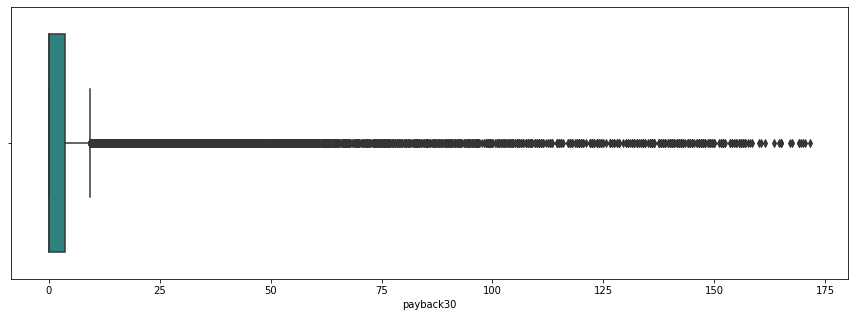

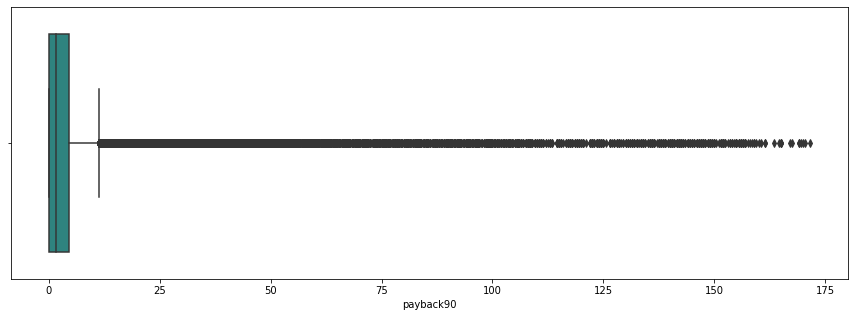

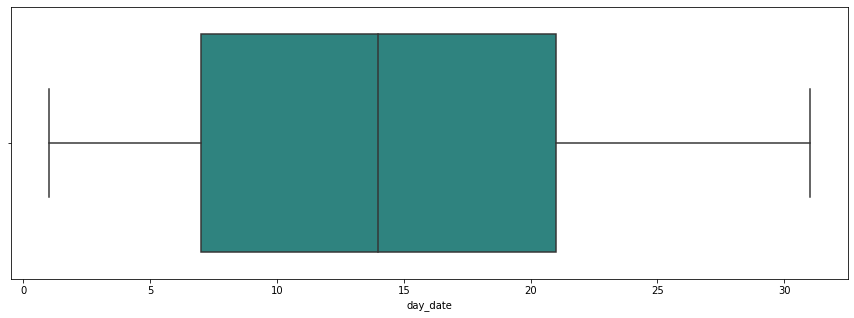

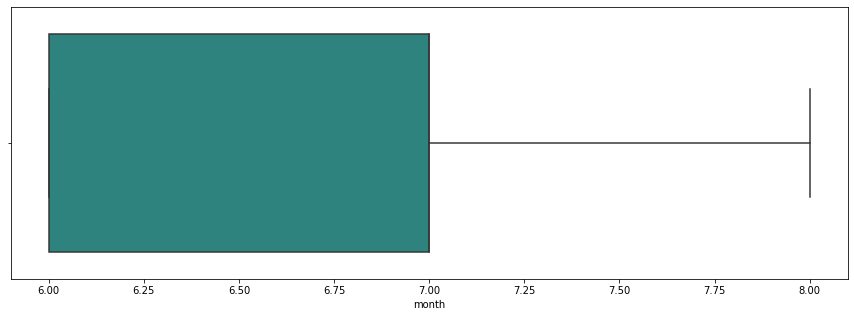

In [63]:
for i in df.select_dtypes(exclude = 'object').columns:
    plt.figure(figsize = (15,5))
    sns.boxplot(df[i], orient='v', palette = 'viridis' )

#### Observations: -
- As per graph most of the columns dataset having outliers

## Removing Outliers from the Dataset

In [65]:
from scipy.stats import zscore

z = np.abs(zscore(df[df.select_dtypes(exclude = 'object').columns]))

# taking thresold value = 3
#np.where(z>3)

df_new = df[(z<3).all(axis = 1)]

In [66]:
np.where(z>3)  

(array([    22,     30,     30, ..., 209550, 209556, 209556], dtype=int64),
 array([23,  6, 18, ...,  3, 18, 21], dtype=int64))

In [67]:
print(df_new.shape)
print(df.shape)

(172480, 36)
(209562, 36)


In [68]:
percentage = round((209562-170514)/209562*100,2)
print(percentage, "Percentage of data loss")  

18.63 Percentage of data loss


## Removing Outliers with Interquartile Method

In [69]:
Q1 = df[df.select_dtypes(exclude = 'object').columns].quantile(.25)
Q3 = df[df.select_dtypes(exclude = 'object').columns].quantile(.75)
IQR = Q3 - Q1

In [70]:
df_IQR = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR))).any(axis = 1)]

In [71]:
print(df_IQR.shape)
print(df.shape)

(68781, 36)
(209562, 36)


In [72]:
percentage = round((209562-67498)/209562*100,2)
print(percentage, "Percentage of data loss")  

67.79 Percentage of data loss


#### From above two methods we find that data loss are much higher hence we are not considering it.

## Checking Distribution of the dataset

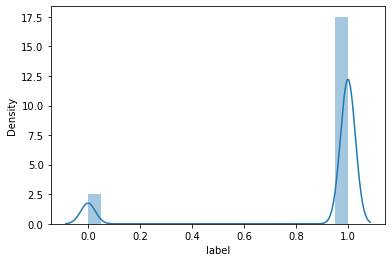

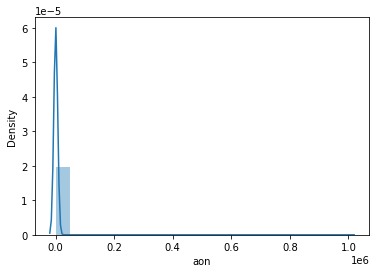

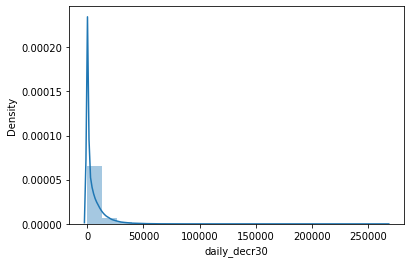

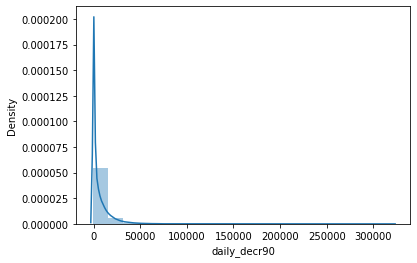

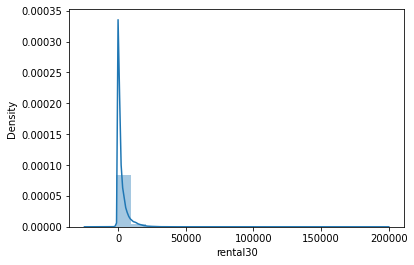

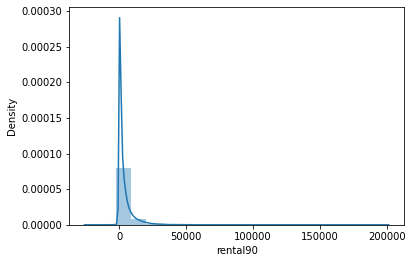

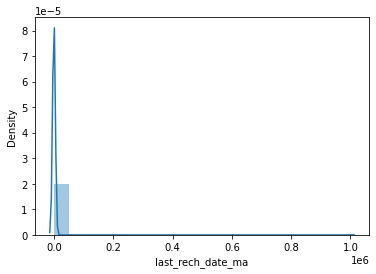

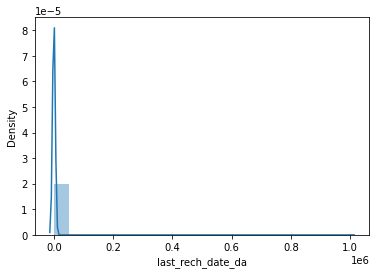

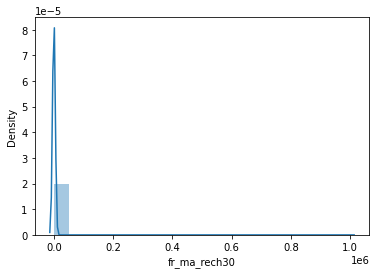

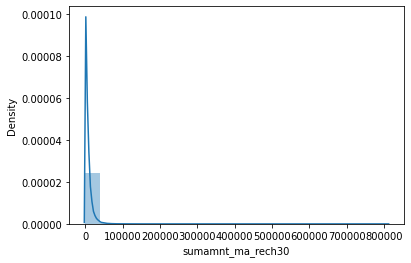

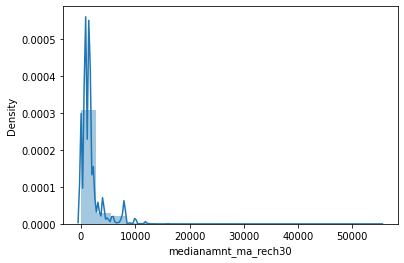

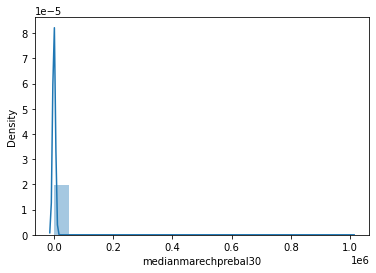

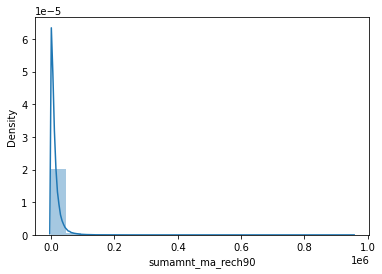

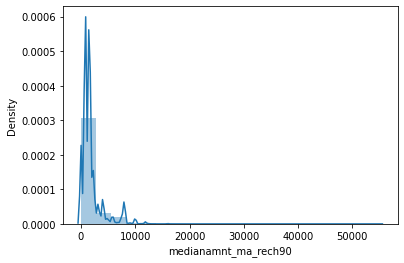

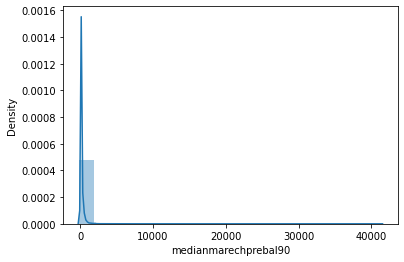

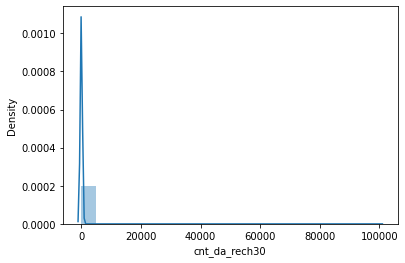

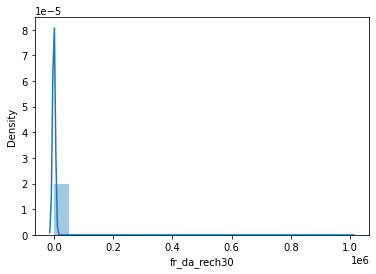

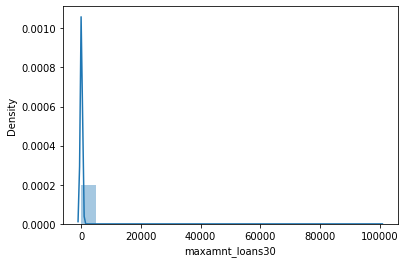

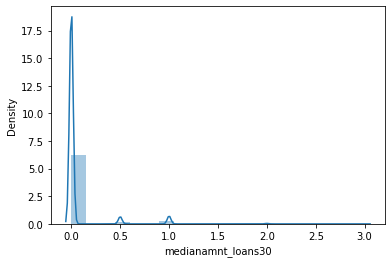

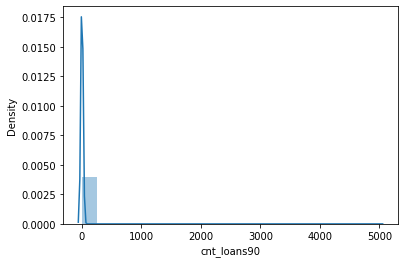

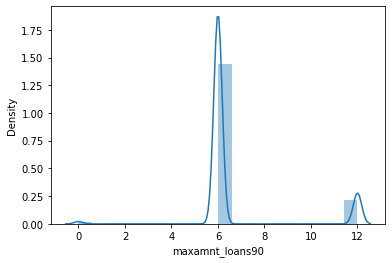

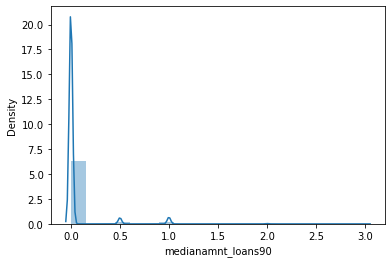

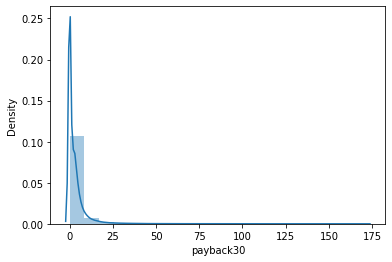

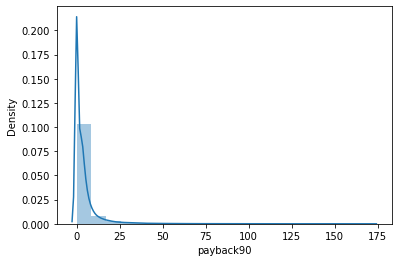

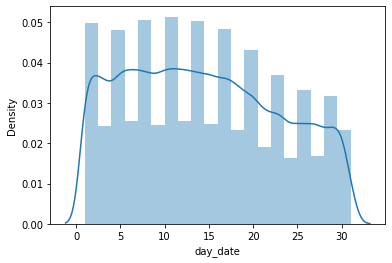

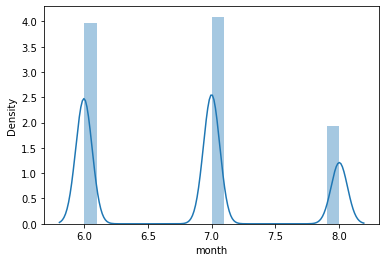

In [73]:
for i in df.select_dtypes(exclude = 'object').columns:
    plt.figure()
    sns.distplot(df[i], bins = 20)

<AxesSubplot:>

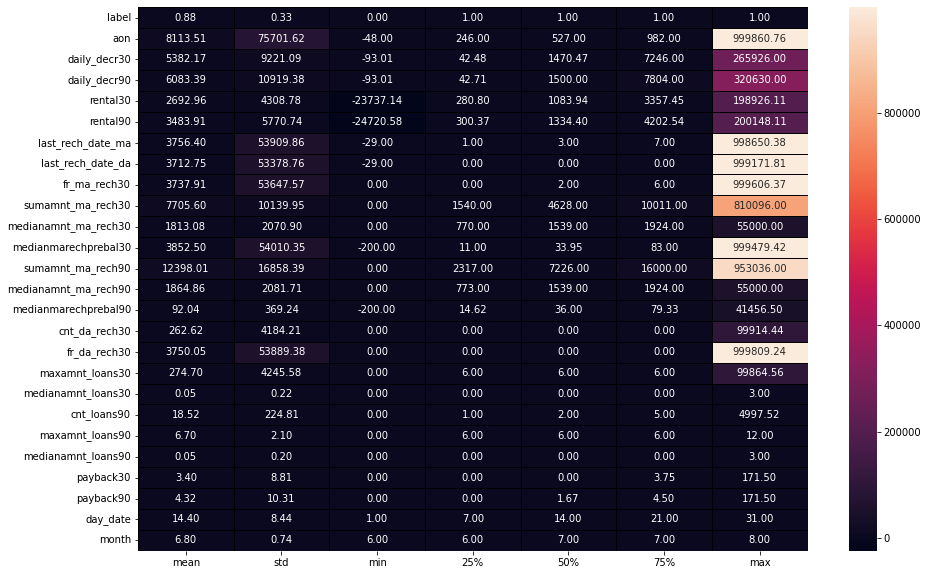

In [74]:
plt.figure(figsize = (15,10))
sns.heatmap(df.describe()[1:].transpose(), annot = True, linecolor='black', linewidths=0.5, fmt = '.2f')

#checking description visually


### Feature Engineering

### Using Chi2 test

In [75]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [76]:
def Testingindependent(colx, coly, alpha = 0.05):
    x = df[colx]
    y = df[coly]
    
    dfobserved = pd.crosstab(y, x)

    chi2, p, dof, expected = stats.chi2_contingency(dfobserved)
    #dfexpected = pd.DataFrame(expected, columns = dfobserved.columns, index = dfobserved.index)


    if p < alpha:
        result = '{0} is important for prediction'.format(colx)
    else:
        result = '{0} is not an important predictor.(Discard {0} from model)'.format(colx)
        
    print(result)

In [77]:
test_column = df.drop('label', axis = 1)

In [79]:
for i in test_column.columns:
    Testingindependent(colx = i, coly = 'label', alpha = 0.05)

aon is important for prediction
daily_decr30 is important for prediction
daily_decr90 is not an important predictor.(Discard daily_decr90 from model)
rental30 is important for prediction
rental90 is not an important predictor.(Discard rental90 from model)
last_rech_date_ma is important for prediction
last_rech_date_da is not an important predictor.(Discard last_rech_date_da from model)
last_rech_amt_ma is important for prediction
cnt_ma_rech30 is important for prediction
fr_ma_rech30 is important for prediction
sumamnt_ma_rech30 is important for prediction
medianamnt_ma_rech30 is important for prediction
medianmarechprebal30 is important for prediction
cnt_ma_rech90 is important for prediction
fr_ma_rech90 is important for prediction
sumamnt_ma_rech90 is important for prediction
medianamnt_ma_rech90 is important for prediction
medianmarechprebal90 is important for prediction
cnt_da_rech30 is not an important predictor.(Discard cnt_da_rech30 from model)
fr_da_rech30 is not an important 

#### From above observation we find out best predictor from models

In [78]:
df.drop(['daily_decr90' , 'rental90' , 'last_rech_date_da' , 'cnt_da_rech30' , 'fr_da_rech30' , 'pcircle' ], axis = 1, inplace = True)

In [79]:
df.head()  # checking important features of the dataset.

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day_date,month
0,0,272.0,3055.050000,220.13,2.0,1-15000 times,1-50 times,21.0,3078.0,1539.0,7.50,1-50 times,20-40 times,3078,1539.0,7.50,Zero times,Zero times,1-10 times,1-50 times,6.0,0.0,2.0,1-100 times,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,3691.26,20.0,1-15000 times,1-50 times,0.0,5787.0,5787.0,61.04,1-50 times,Zero times,5787,5787.0,61.04,Zero times,Zero times,1-10 times,1-50 times,12.0,0.0,1.0,1-100 times,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,900.13,3.0,1-15000 times,1-50 times,0.0,1539.0,1539.0,66.32,1-50 times,Zero times,1539,1539.0,66.32,Zero times,Zero times,1-10 times,1-50 times,6.0,0.0,1.0,1-100 times,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,159.42,41.0,1-15000 times,Zero times,0.0,0.0,0.0,0.00,1-50 times,Zero times,947,947.0,2.50,Zero times,Zero times,1-10 times,1-50 times,6.0,0.0,2.0,1-100 times,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,1098.90,4.0,1-15000 times,1-50 times,2.0,20029.0,2309.0,29.00,1-50 times,1-20 times,23496,2888.0,35.00,Zero times,Zero times,1-10 times,1-50 times,6.0,0.0,7.0,1-100 times,6,0.0,2.333333,2.333333,22,6


#### CHECKING MULICOLLINEARITY
Comparing features with features uding HeatMap-Pearsons correlation

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

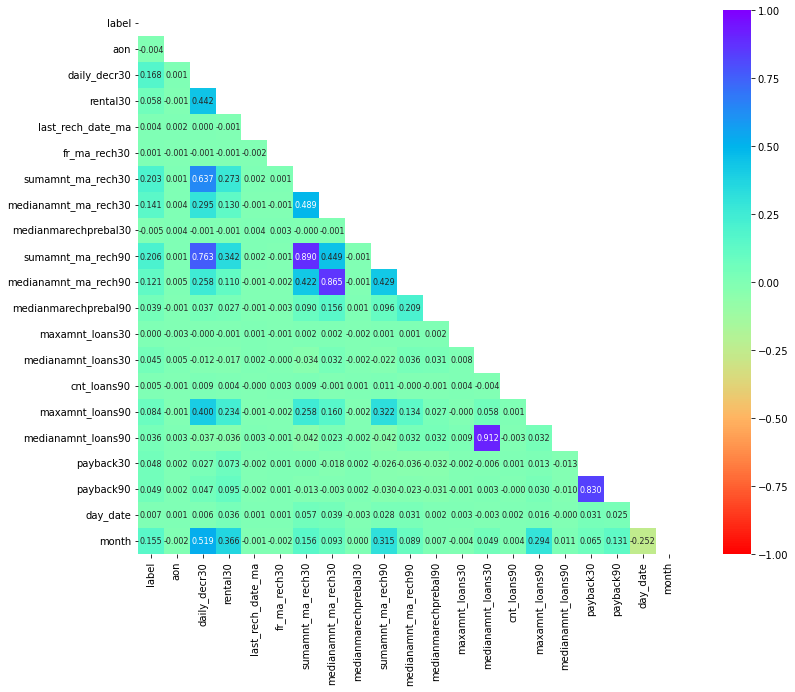

In [80]:
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="rainbow_r", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


#### Variance inflation factor

In [81]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [82]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['Variance'] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [83]:
x = df.drop('label', axis = 1)
y = df['label']

In [84]:
num_col = ['aon', 'daily_decr30', 'rental30', 'last_rech_date_ma','fr_ma_rech30',
   'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 
    'sumamnt_ma_rech90','medianamnt_ma_rech90', 'medianmarechprebal90', 
   'maxamnt_loans30','medianamnt_loans30', 'cnt_loans90',
   'payback30', 'payback90', 'day_date']

In [85]:
calc_vif(x[num_col])  # checking VIF of numerical columns

,Variance,VIF Factor
0,aon,1.009571
1,daily_decr30,3.664129
2,rental30,1.711770
3,last_rech_date_ma,1.003976
4,fr_ma_rech30,1.003961
5,sumamnt_ma_rech30,8.448510
6,medianamnt_ma_rech30,7.773267
7,medianmarechprebal30,1.004025
8,sumamnt_ma_rech90,11.467420
9,medianamnt_ma_rech90,7.552948


#### VIF are under acceptable zone 

#### Changing Categorical into Machine format

In [86]:
from sklearn.preprocessing import OrdinalEncoder
onc = OrdinalEncoder()

for i in x.select_dtypes(include = 'object').columns:
    x[i] = onc.fit_transform(x[i].values.reshape(-1,1))
    
x.head()

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day_date,month
0,272.0,3055.050000,220.13,2.0,0.0,0.0,21.0,3078.0,1539.0,7.50,0.0,1.0,3078,1539.0,7.50,4.0,7.0,0.0,0.0,6.0,0.0,2.0,0.0,6,0.0,29.000000,29.000000,20,7
1,712.0,12122.000000,3691.26,20.0,0.0,0.0,0.0,5787.0,5787.0,61.04,0.0,5.0,5787,5787.0,61.04,4.0,7.0,0.0,0.0,12.0,0.0,1.0,0.0,12,0.0,0.000000,0.000000,10,8
2,535.0,1398.000000,900.13,3.0,0.0,0.0,0.0,1539.0,1539.0,66.32,0.0,5.0,1539,1539.0,66.32,4.0,7.0,0.0,0.0,6.0,0.0,1.0,0.0,6,0.0,0.000000,0.000000,19,8
3,241.0,21.228000,159.42,41.0,0.0,4.0,0.0,0.0,0.0,0.00,0.0,5.0,947,947.0,2.50,4.0,7.0,0.0,0.0,6.0,0.0,2.0,0.0,6,0.0,0.000000,0.000000,6,6
4,947.0,150.619333,1098.90,4.0,0.0,0.0,2.0,20029.0,2309.0,29.00,0.0,0.0,23496,2888.0,35.00,4.0,7.0,0.0,0.0,6.0,0.0,7.0,0.0,6,0.0,2.333333,2.333333,22,6


## Removing Skewness¶

In [87]:
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer()

In [88]:
x[num_col].skew()  # checking skewness

aon                     10.392159
daily_decr30             3.945997
rental30                 4.521743
last_rech_date_ma       14.789865
fr_ma_rech30            14.771725
sumamnt_ma_rech30        6.386845
medianamnt_ma_rech30     3.512361
medianmarechprebal30    14.778767
sumamnt_ma_rech90        4.897896
medianamnt_ma_rech90     3.752792
medianmarechprebal90    44.877678
maxamnt_loans30         17.656733
medianamnt_loans30       4.550661
cnt_loans90             16.593169
payback30                8.311013
payback90                6.900024
day_date                 0.199744
dtype: float64

In [89]:
df_skew = x[num_col].copy()  # making a new variable so that main dataframe not disturbed

### Using Power Transformer Method

In [90]:
skew_x = pw.fit_transform(df_skew)

In [91]:
skew_x = pd.DataFrame(data = skew_x, columns = num_col)

In [92]:
skew_x.skew()

aon                     1.654672
daily_decr30           -6.578784
rental30               -1.020249
last_rech_date_ma      -5.361687
fr_ma_rech30            0.164892
sumamnt_ma_rech30      -0.290988
medianamnt_ma_rech30   -0.189169
medianmarechprebal30   -0.118247
sumamnt_ma_rech90      -0.191753
medianamnt_ma_rech90   -0.044012
medianmarechprebal90    7.507637
maxamnt_loans30        -1.679963
medianamnt_loans30      3.447419
cnt_loans90             0.105503
payback30               0.298419
payback90               0.210764
day_date               -0.156104
dtype: float64

Observations: Most of the dataset are under thresold values hence we are not going to disturb dataframe further more.

In [93]:
x[num_col] = pw.fit_transform(x[num_col])

In [94]:
x[num_col].skew()   # done in main dataframe

aon                     1.654672
daily_decr30           -6.578784
rental30               -1.020249
last_rech_date_ma      -5.361687
fr_ma_rech30            0.164892
sumamnt_ma_rech30      -0.290988
medianamnt_ma_rech30   -0.189169
medianmarechprebal30   -0.118247
sumamnt_ma_rech90      -0.191753
medianamnt_ma_rech90   -0.044012
medianmarechprebal90    7.507637
maxamnt_loans30        -1.679963
medianamnt_loans30      3.447419
cnt_loans90             0.105503
payback30               0.298419
payback90               0.210764
day_date               -0.156104
dtype: float64

### Standard Scaler

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[num_col] = scaler.fit_transform(x[num_col])

In [96]:
x.head()

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day_date,month
0,-0.177142,0.331978,-0.580876,-0.025529,0.0,0.0,1.603221,-0.178281,0.208319,-0.041310,0.0,1.0,-0.440733,0.145911,-0.325884,4.0,7.0,0.0,0.0,-0.102006,-0.269073,-0.186984,0.0,6,0.0,1.813345,1.784020,0.710741,7
1,0.036408,1.115924,0.339622,0.191337,0.0,0.0,-1.129108,0.219532,1.632552,0.016912,0.0,5.0,-0.087031,1.682422,-0.002785,4.0,7.0,0.0,0.0,1.182329,-0.269073,-1.034429,0.0,12,0.0,-0.937512,-1.019040,-0.410244,8
2,-0.034699,-0.007711,-0.367064,0.000026,0.0,0.0,-1.129108,-0.535808,0.208319,0.020751,0.0,5.0,-0.761042,0.145911,0.023705,4.0,7.0,0.0,0.0,-0.102006,-0.269073,-1.034429,0.0,6,0.0,-0.937512,-1.019040,0.609887,8
3,-0.199242,-1.031704,-0.603147,0.299322,0.0,4.0,-1.129108,-1.902672,-1.962288,-0.063978,0.0,5.0,-0.949860,-0.254193,-0.371008,4.0,7.0,0.0,0.0,-0.102006,-0.269073,-0.186984,0.0,6,0.0,-0.937512,-1.019040,-0.968799,6
4,0.114830,-0.682563,-0.310574,0.021212,0.0,0.0,0.188668,1.262697,0.574988,-0.011189,0.0,0.0,0.974061,0.783441,-0.143033,4.0,7.0,0.0,0.0,-0.102006,-0.269073,1.180171,0.0,6,0.0,0.639030,0.431226,0.906999,6


In [97]:
x = pd.get_dummies(data = x, columns = ['last_rech_amt_ma',
 'cnt_ma_rech30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'month'])

In [98]:
x.shape

(209562, 85)

## Sythetic Minority Oversampling Technique

<AxesSubplot:xlabel='label', ylabel='count'>

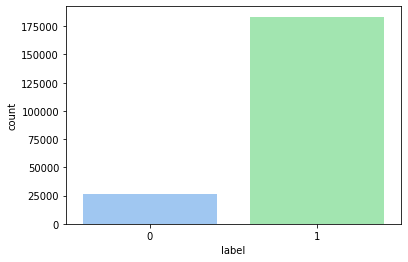

In [99]:
sns.countplot(y)

### We find that label values are not balanced and training these dataset for machine learning show biased prediction hence we need to fix it.

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
sm = SMOTE()
x, y = sm.fit_resample(x, y)

In [102]:
print(x.shape)
print(y.shape)

(366858, 85)
(366858,)


#### Model Building

In [147]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score
import random


#### Finding best random state

In [110]:
model = LogisticRegression()
for i in random.sample(range(1, 200), 30):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    training = accuracy_score(pred_train, y_train)
    testing = accuracy_score(pred_test, y_test)
            
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 171
Training accuracy_score is:- 81.42601246105919
Testing accuracy_score is:- 81.346199276745


At random_state:- 58
Training accuracy_score is:- 81.45521806853583
Testing accuracy_score is:- 81.42161405804212


At random_state:- 109
Training accuracy_score is:- 81.47274143302181
Testing accuracy_score is:- 81.36346290137926


At random_state:- 141
Training accuracy_score is:- 81.42095015576324
Testing accuracy_score is:- 81.47249632012212


At random_state:- 103
Training accuracy_score is:- 81.35825545171339
Testing accuracy_score is:- 81.53700775954496


At random_state:- 23
Training accuracy_score is:- 81.43691588785047
Testing accuracy_score is:- 81.4388776826764


At random_state:- 25
Training accuracy_score is:- 81.48753894080997
Testing accuracy_score is:- 81.34438205309927


At random_state:- 142
Training accuracy_score is:- 81.45677570093459
Testing accuracy_score is:- 81.50793218121353


At random_state:- 37
Training accuracy_score is:- 81.49805295950155
Te

#### Splitting data into train, cv, test, so that machine learning didn't get any previous learn data for prediction

In [123]:
train, test, train_output, test_output = train_test_split(x, y,
                                                         test_size = 0.3,
                                                         stratify = y,
                                                         random_state = 70)

train, cv, train_output, cv_output = train_test_split(train, 
                                                      train_output,
                                                     test_size = 0.3,
                                                     stratify = train_output,
                                                     random_state = 70)
#at random state 70 model gives best training and testing result

In [105]:
train.shape, cv.shape, test.shape

((179760, 85), (77040, 85), (110058, 85))

In [106]:
train_output.shape, cv_output.shape, test_output.shape

((179760,), (77040,), (110058,))

In [171]:
def final_model(model):
    print("***********************",model,"****************************")
    model.fit(train, train_output)
    model_pred_cv = model.predict(cv)
    cv_acc = accuracy_score(model_pred_cv, cv_output)
    print('cv_accuracy', cv_acc)
    model_pred_test = model.predict(test)
    test_acc = accuracy_score(model_pred_test, test_output)
    print('test_accuracy', test_acc, '\n')
    print('Classification Report: \n', classification_report(model_pred_test, test_output) )
    print('Confusion Matrix: \n', confusion_matrix(model_pred_test, test_output) )
    print("\n")


In [172]:
models = [LogisticRegression(), GaussianNB(),SGDClassifier(), RandomForestClassifier(), AdaBoostClassifier(),
GradientBoostingClassifier(), BaggingClassifier(), DecisionTreeClassifier(), XGBClassifier()]
for i in models:
    final_model(i)

*********************** LogisticRegression() ****************************
cv_accuracy 0.81452492211838
test_accuracy 0.8140253320976213 

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82     57061
           1       0.80      0.83      0.81     52997

    accuracy                           0.81    110058
   macro avg       0.81      0.81      0.81    110058
weighted avg       0.81      0.81      0.81    110058

Confusion Matrix: 
 [[45811 11250]
 [ 9218 43779]]


*********************** GaussianNB() ****************************
cv_accuracy 0.6339823468328141
test_accuracy 0.6329389958022134 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73     94895
           1       0.27      0.98      0.42     15163

    accuracy                           0.63    110058
   macro avg       0.63      0.78      0.58    110058
weighted avg       0.90     

In [68]:
# *********************** LogisticRegression() ****************************
# cv_accuracy 0.81452492211838
# test_accuracy 0.8140253320976213 

# *********************** SGDClassifier() ****************************
# cv_accuracy 0.8089693665628245
# test_accuracy 0.808446455505279 

# *********************** GaussianNB() ****************************
# cv_accuracy 0.6339823468328141
# test_accuracy 0.6329389958022134 

# *********************** RandomForestClassifier() ****************************
# cv_accuracy 0.9398753894080997
# test_accuracy 0.9401315669919497 

# *********************** AdaBoostClassifier() ****************************
# cv_accuracy 0.8407969885773624
# test_accuracy 0.843028221483218 

# *********************** GradientBoostingClassifier() ****************************
# cv_accuracy 0.8903426791277259
# test_accuracy 0.8914118010503552 

# *********************** BaggingClassifier() ****************************
# cv_accuracy 0.9269210799584632
# test_accuracy 0.9259844809100656 

# *********************** DecisionTreeClassifier() ****************************
# cv_accuracy 0.8949896157840083
# test_accuracy 0.8950008177506406 

# *********************** XGBClassifier() ****************************
# cv_accuracy 0.9474039460020769
# test_accuracy 0.9472459975649203 


#### From above all model we find that XGBClassifier shows similar CV and testing accuracy result with least difference hence we are going to consider it for model building.

#### Hyper Parameter Tuning

In [193]:
params = {'base_score': [0.5, 1, 1.5], 'booster' : ['gbtree','gblinear ', 'dart', None], 'colsample_bylevel': [1,2,3],
          'n_jobs': [1, 2, 3]}

In [195]:
gcv = GridSearchCV(estimator = XGBClassifier(), param_grid = params)
gcv.fit(train, train_output)
gcv.best_params_

#model gives better prediction with params hence we dont consider it.

In [198]:
final_model = XGBClassifier()
final_model.fit(train, train_output)
model_pred_test = final_model.predict(test)
test_acc = accuracy_score(model_pred_test, test_output)
print('test_accuracy', test_acc, '\n')
print('Classification Report: \n', classification_report(model_pred_test, test_output) )
print('Confusion Matrix: \n', confusion_matrix(model_pred_test, test_output) )
print("\n")


test_accuracy 0.9472459975649203 

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     54557
           1       0.95      0.94      0.95     55501

    accuracy                           0.95    110058
   macro avg       0.95      0.95      0.95    110058
weighted avg       0.95      0.95      0.95    110058

Confusion Matrix: 
 [[51890  2667]
 [ 3139 52362]]




## Using Predict Proba function for finding accuracy (i.e Getting approved loan)

In [187]:
final_pred_prob = model.predict_proba(test)[:, 1]

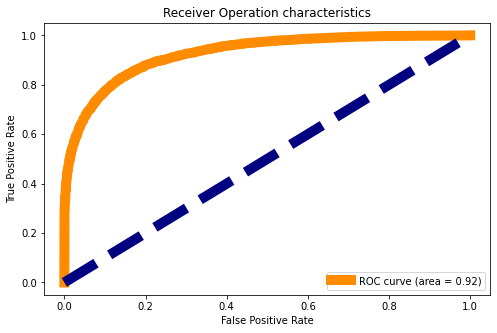

In [188]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresolds = roc_curve(test_output, final_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw = 10, linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operation characteristics")
plt.legend(loc = "lower right")
plt.show()

### Deploy Model

In [189]:
import pickle

filename = "Microcredit.pkl"
pickle.dump(final_model, open(filename, 'wb'))

### Loading Model

In [190]:
load = pickle.load(open('Microcredit.pkl', 'rb'))
result = load.score(test, test_output)
print(result)

0.9472459975649203


In [191]:
conclusion = pd.DataFrame()
conclusion['Predicted Microcredit label'] = np.array(final_model.predict(test))
conclusion['Actual Microcredit label'] = np.array(test_output)

In [192]:
conclusion.sample(10)

,Predicted Microcredit label,Actual Microcredit label
3971,1,1
92599,1,1
51038,1,1
67833,1,1
71170,0,0
50984,0,0
44452,1,1
47929,1,1
31616,1,1
79104,0,0
